# House_Price_Prediction

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# !pip install sweetviz
import sweetviz as sv

# !pip install category_encoders
import category_encoders as ce

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

# Day - 2

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.decomposition import PCA

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Day - 3 



In [3]:
df_price = pd.read_csv("houseprice.csv")
df_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


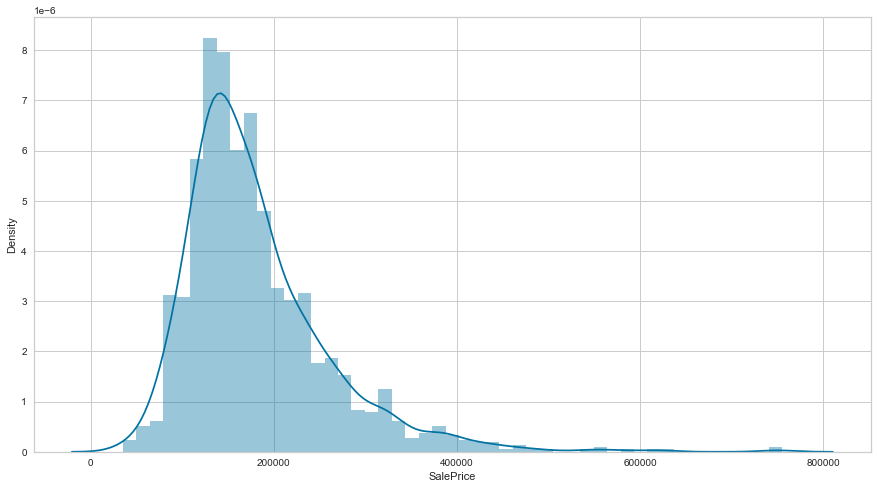

In [4]:
plt.figure(figsize = (15, 8))
sns.distplot(df_price["SalePrice"])
plt.show()

In [5]:
df_price.drop("Id", axis = 1, inplace = True)
df_price.shape

(1460, 80)

# Change the DataType

In [6]:
cols = ["MSSubClass", "OverallQual", "OverallCond"]

In [7]:
for i in cols:
    df_price[i] = df_price[i].astype("object")

In [8]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

# Check if there are any missing values

In [9]:
(df_price.isnull().sum() / df_price.index.size) * 100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [10]:
# We are sorting by descending order

In [11]:
(df_price.isnull().sum()/(df_price.index.size)*100)[(df_price.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

# Missing Values 

1. PoolQC, MiscFeature, Alley and Fence have high values of null.

2. Option is to drop these variables.

3. Instead of dropping let us do something feature engineering.

In [12]:
df_num = df_price.select_dtypes(include = np.number)
df_num = df_num.drop("SalePrice", axis = 1)

df_cat = df_price.select_dtypes(exclude = np.number)

# Univariate Analysis 

In [13]:
cols = list(df_num.columns)
cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

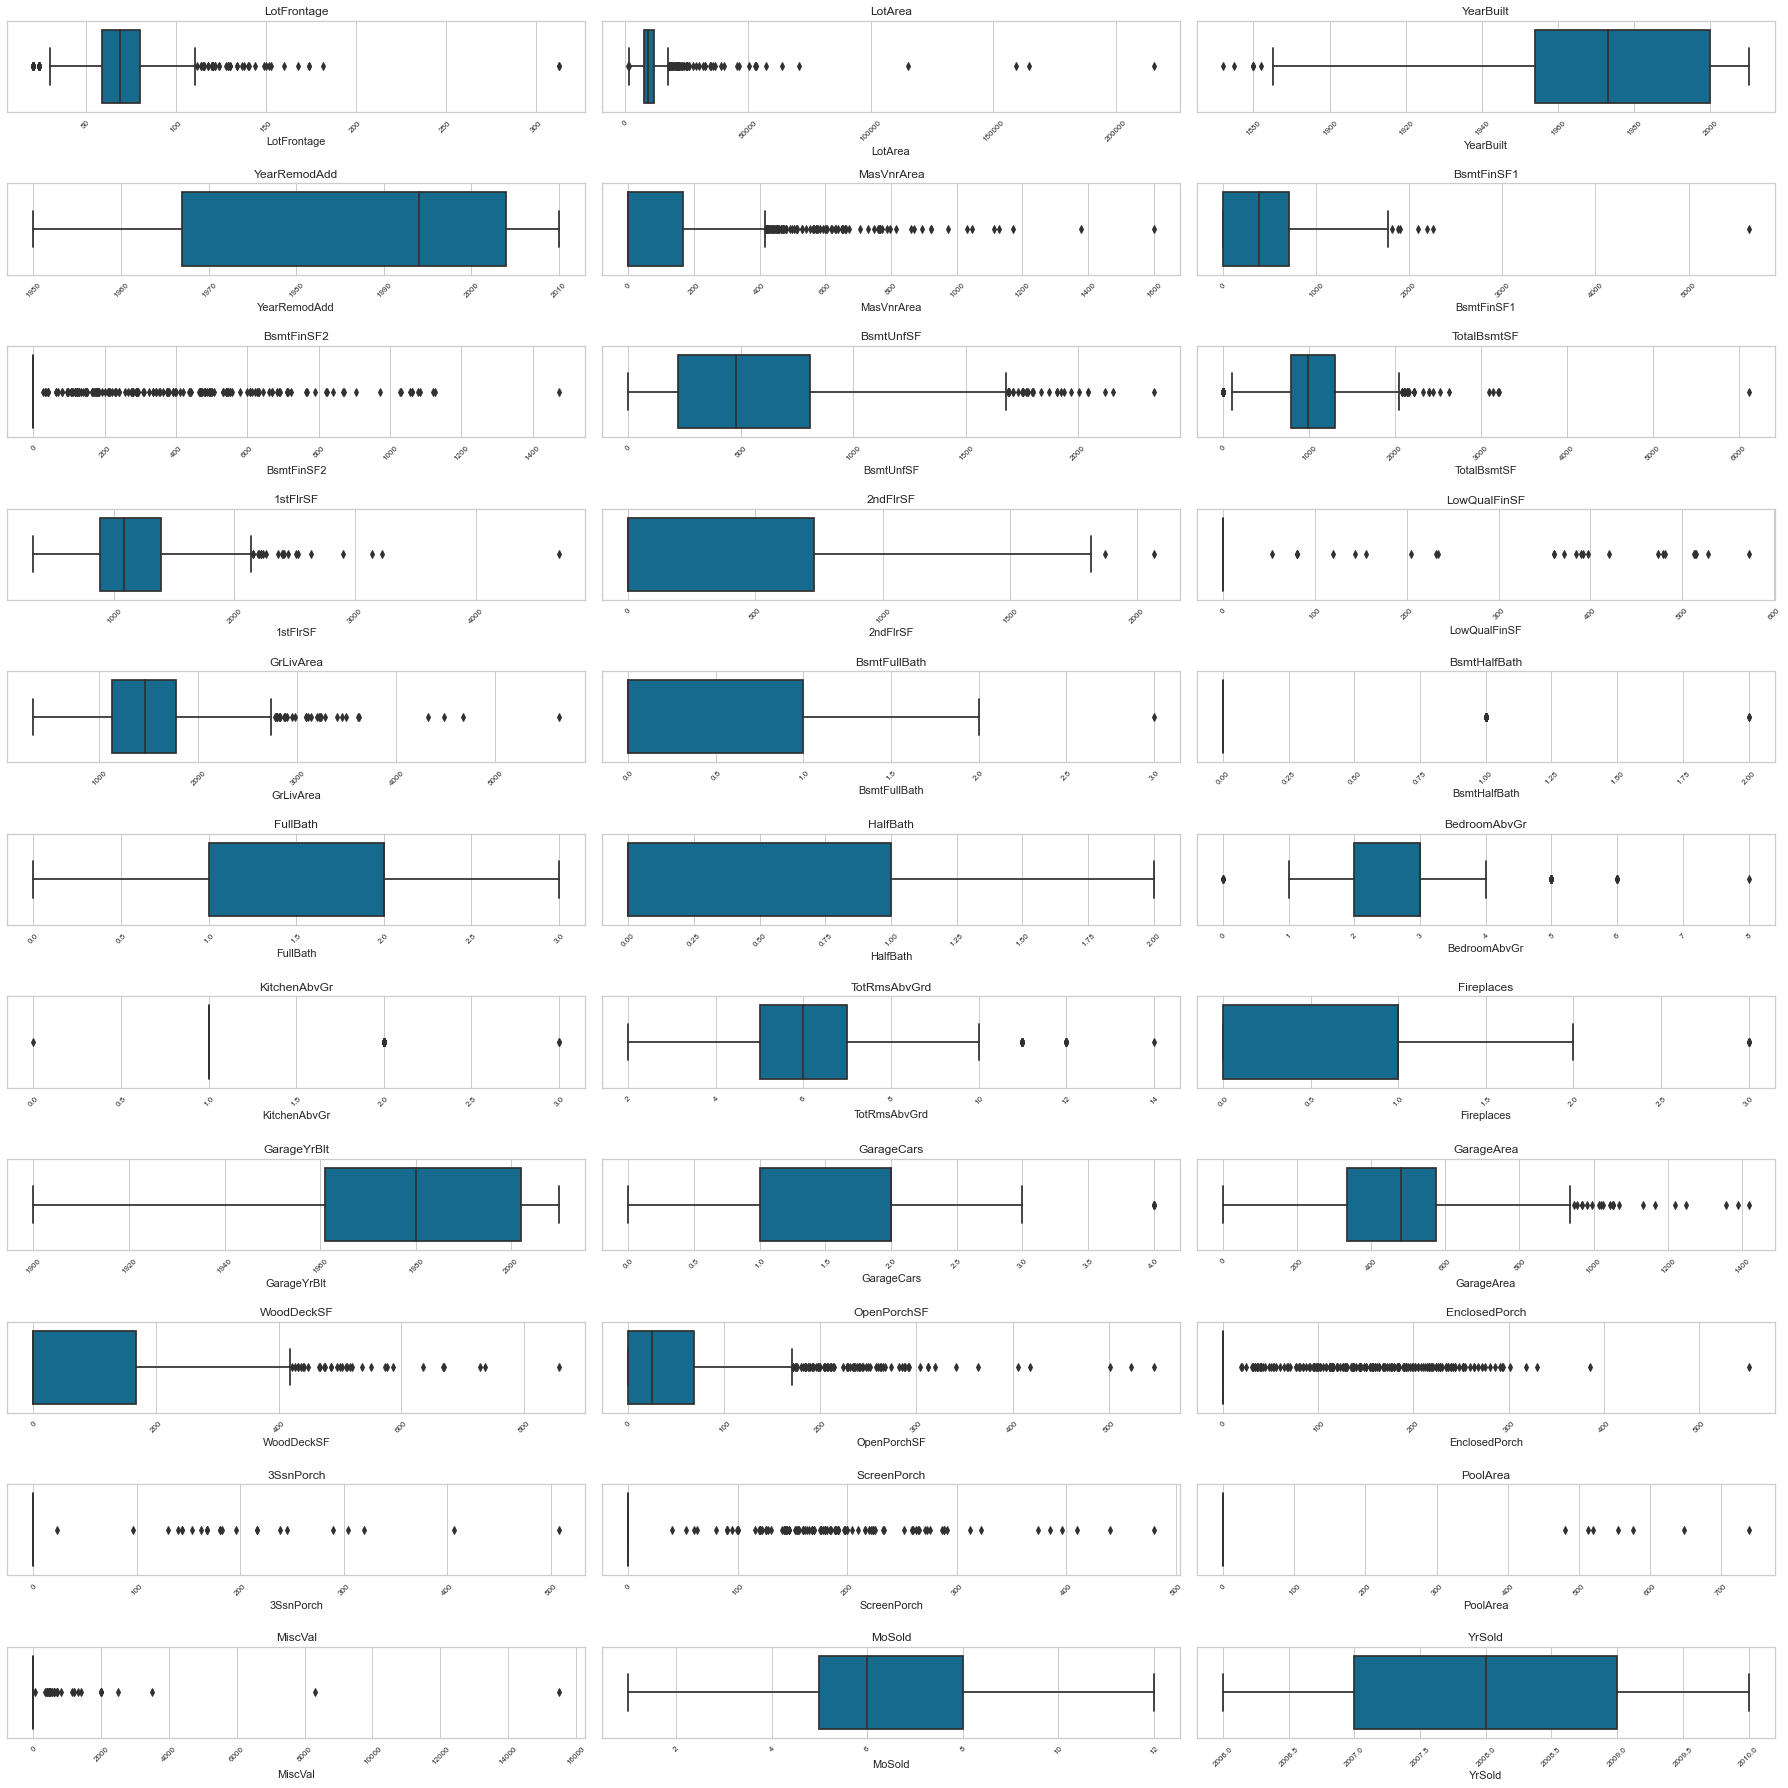

In [14]:
plt.rcParams["figure.figsize"] = 25, 25

j = 1
for i in cols:
    plt.subplot(11, 3, j)
    sns.boxplot(x = df_num.loc[:, i])
    plt.title(i)
    j = j + 1
    
    plt.xticks(rotation = 45, fontsize = 8)
    
plt.tight_layout()
plt.show()

# Use KNN IMputer for imputing missing numerical values

In [15]:
# from sklearn.impute import KNNImputer

In [16]:
imputer = KNNImputer(n_neighbors = 5)
df_num_sc = pd.DataFrame(imputer.fit_transform(df_num), columns = df_num.columns)

In [17]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

In [18]:
# All Numeric numbers are Imputed

# Impute Categorical Variables

In [19]:
(df_cat.isnull().sum()/(df_price.index.size)*100)[(df_cat.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [20]:
# First 4 variables have to deal with differently 

In [21]:
df_cat['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [22]:
# 1. Where ever the data is available mark it as 1. Where ever, data is not available mark it as 0.

In [23]:
df_cat['PoolQC_ava']=df_cat['PoolQC'].replace(np.nan,0).replace('Gd',1).replace('Ex',1).replace('Fa',1)

In [24]:
df_cat['PoolQC_ava'].value_counts()

0    1453
1       7
Name: PoolQC_ava, dtype: int64

In [25]:
df_cat['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [26]:
df_cat['MiscFeature_ava']=df_cat['MiscFeature'].replace(np.nan,0).replace('Shed',1).replace('Gar2',1).replace('Othr',1).replace('TenC',1)

In [27]:
df_cat['MiscFeature_ava'].value_counts()

0    1406
1      54
Name: MiscFeature_ava, dtype: int64

In [28]:
df_cat['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [29]:
df_cat['Alley_ava']=df_cat['Alley'].replace(np.nan,0).replace('Grvl',1).replace('Pave',1)

In [30]:
df_cat['Alley_ava'].value_counts()

0    1369
1      91
Name: Alley_ava, dtype: int64

In [31]:
df_cat['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [32]:
df_cat['Fence_ava']=df_cat['Fence'].replace(np.nan,0).replace('MnPrv',1).replace('GdPrv',1).replace('GdWo',1).replace('MnWw',1)

In [33]:
df_cat['Fence_ava'].value_counts()

0    1179
1     281
Name: Fence_ava, dtype: int64

In [34]:
df_cat['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [35]:
df_cat['FireplaceQu_ava']=df_cat['FireplaceQu'].replace(np.nan,0).replace('Gd',1).replace('TA',1).replace('Fa',1).replace('Ex',1).replace('Po',1)

In [36]:
df_cat['FireplaceQu_ava'].value_counts()

1    770
0    690
Name: FireplaceQu_ava, dtype: int64

In [37]:
df_cat['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [38]:
df_cat['MasVnrType_ava']= df_cat['MasVnrType'].replace(np.nan,0).replace('BrkFace',1).replace('Stone',1).replace('BrkCmn',1)

In [39]:
df_cat['MasVnrType_ava'].value_counts()

None    864
1       588
0         8
Name: MasVnrType_ava, dtype: int64

## All the highly missing values in the columns have been Feature Engineering.

1. Drop the Columns which have Feature Engineering.

2. Drop the Old columns and retain the new columns which have Feature Engineering.

In [40]:
df_cat.drop(['PoolQC','Alley','Fence','FireplaceQu','MiscFeature','MasVnrType'],axis=1,inplace=True)

In [41]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSSubClass       1460 non-null   object
 1   MSZoning         1460 non-null   object
 2   Street           1460 non-null   object
 3   LotShape         1460 non-null   object
 4   LandContour      1460 non-null   object
 5   Utilities        1460 non-null   object
 6   LotConfig        1460 non-null   object
 7   LandSlope        1460 non-null   object
 8   Neighborhood     1460 non-null   object
 9   Condition1       1460 non-null   object
 10  Condition2       1460 non-null   object
 11  BldgType         1460 non-null   object
 12  HouseStyle       1460 non-null   object
 13  OverallQual      1460 non-null   object
 14  OverallCond      1460 non-null   object
 15  RoofStyle        1460 non-null   object
 16  RoofMatl         1460 non-null   object
 17  Exterior1st      1460 non-null   

In [42]:
df_cat[['PoolQC_ava','Alley_ava','Fence_ava','FireplaceQu_ava','MiscFeature_ava','MasVnrType_ava']] = df_cat[['PoolQC_ava','Alley_ava','Fence_ava','FireplaceQu_ava','MiscFeature_ava','MasVnrType_ava']].astype(object)

In [43]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSSubClass       1460 non-null   object
 1   MSZoning         1460 non-null   object
 2   Street           1460 non-null   object
 3   LotShape         1460 non-null   object
 4   LandContour      1460 non-null   object
 5   Utilities        1460 non-null   object
 6   LotConfig        1460 non-null   object
 7   LandSlope        1460 non-null   object
 8   Neighborhood     1460 non-null   object
 9   Condition1       1460 non-null   object
 10  Condition2       1460 non-null   object
 11  BldgType         1460 non-null   object
 12  HouseStyle       1460 non-null   object
 13  OverallQual      1460 non-null   object
 14  OverallCond      1460 non-null   object
 15  RoofStyle        1460 non-null   object
 16  RoofMatl         1460 non-null   object
 17  Exterior1st      1460 non-null   

In [44]:
(df_cat.isnull().sum() / (df_price.index.size) * 100) [(df_cat.isnull().sum() / df_price.index.size) * 100 > 0].sort_values(ascending = False)

GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
Electrical      0.068493
dtype: float64

In [45]:
# from sklearn.impute import SimpleImputer

In [46]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# fit it on all non object

imputer = imputer.fit(df_cat.iloc[:, :])

In [47]:
df_cat_trans = imputer.transform(df_cat)

In [48]:
df_cat = pd.DataFrame(df_cat_trans, columns = df_cat.columns)

In [49]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

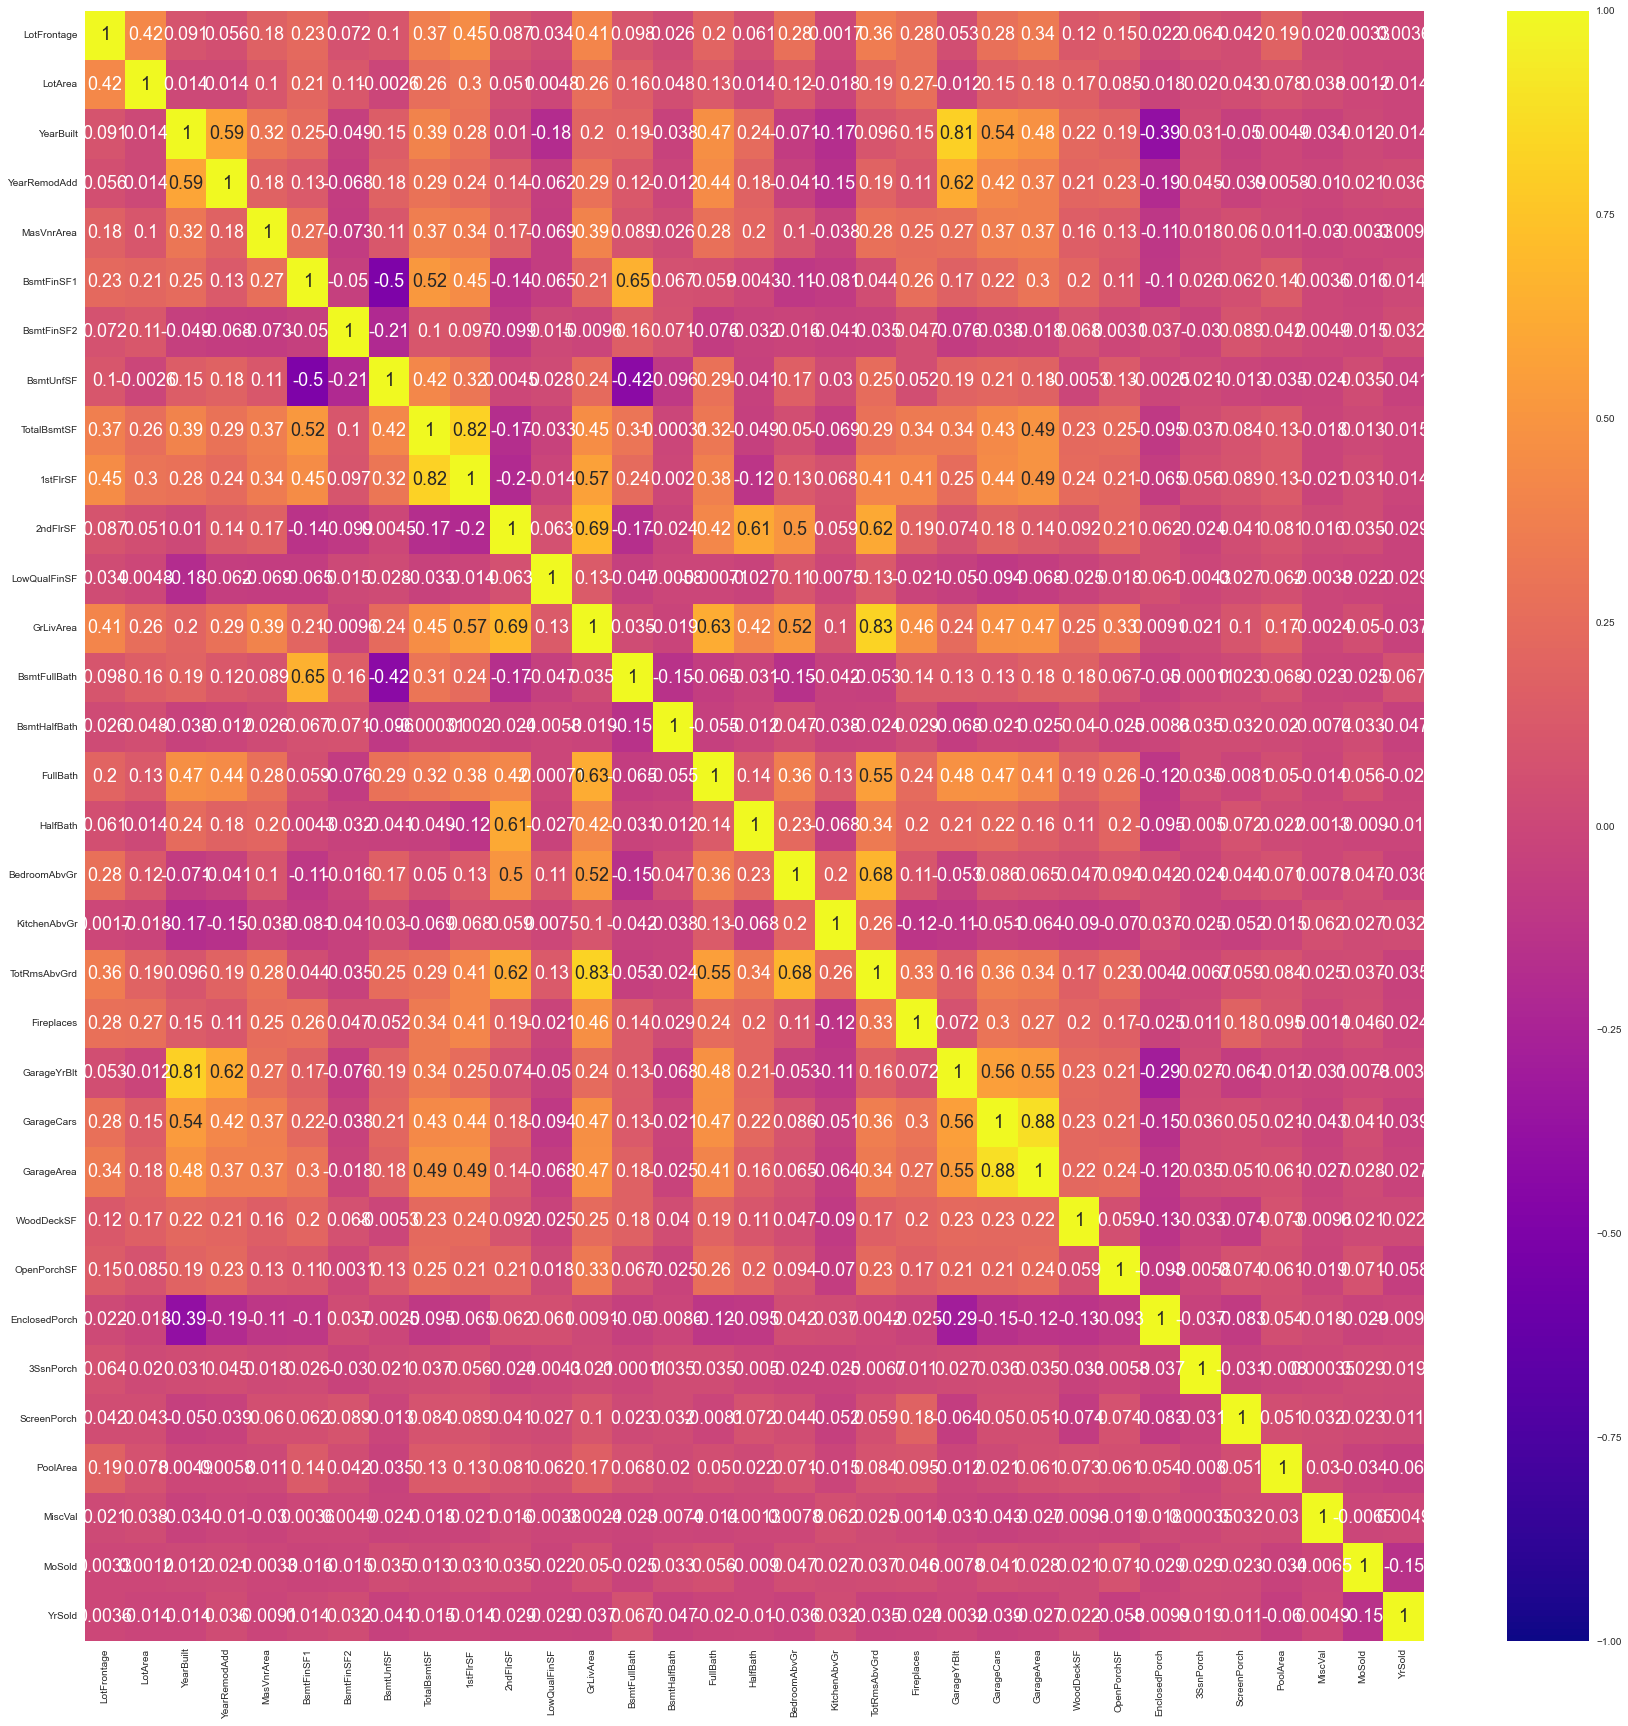

In [50]:
plt.figure(figsize = (30, 30))

sns.heatmap(df_num_sc.corr(), cmap = "plasma", vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size" : 18})
plt.show()

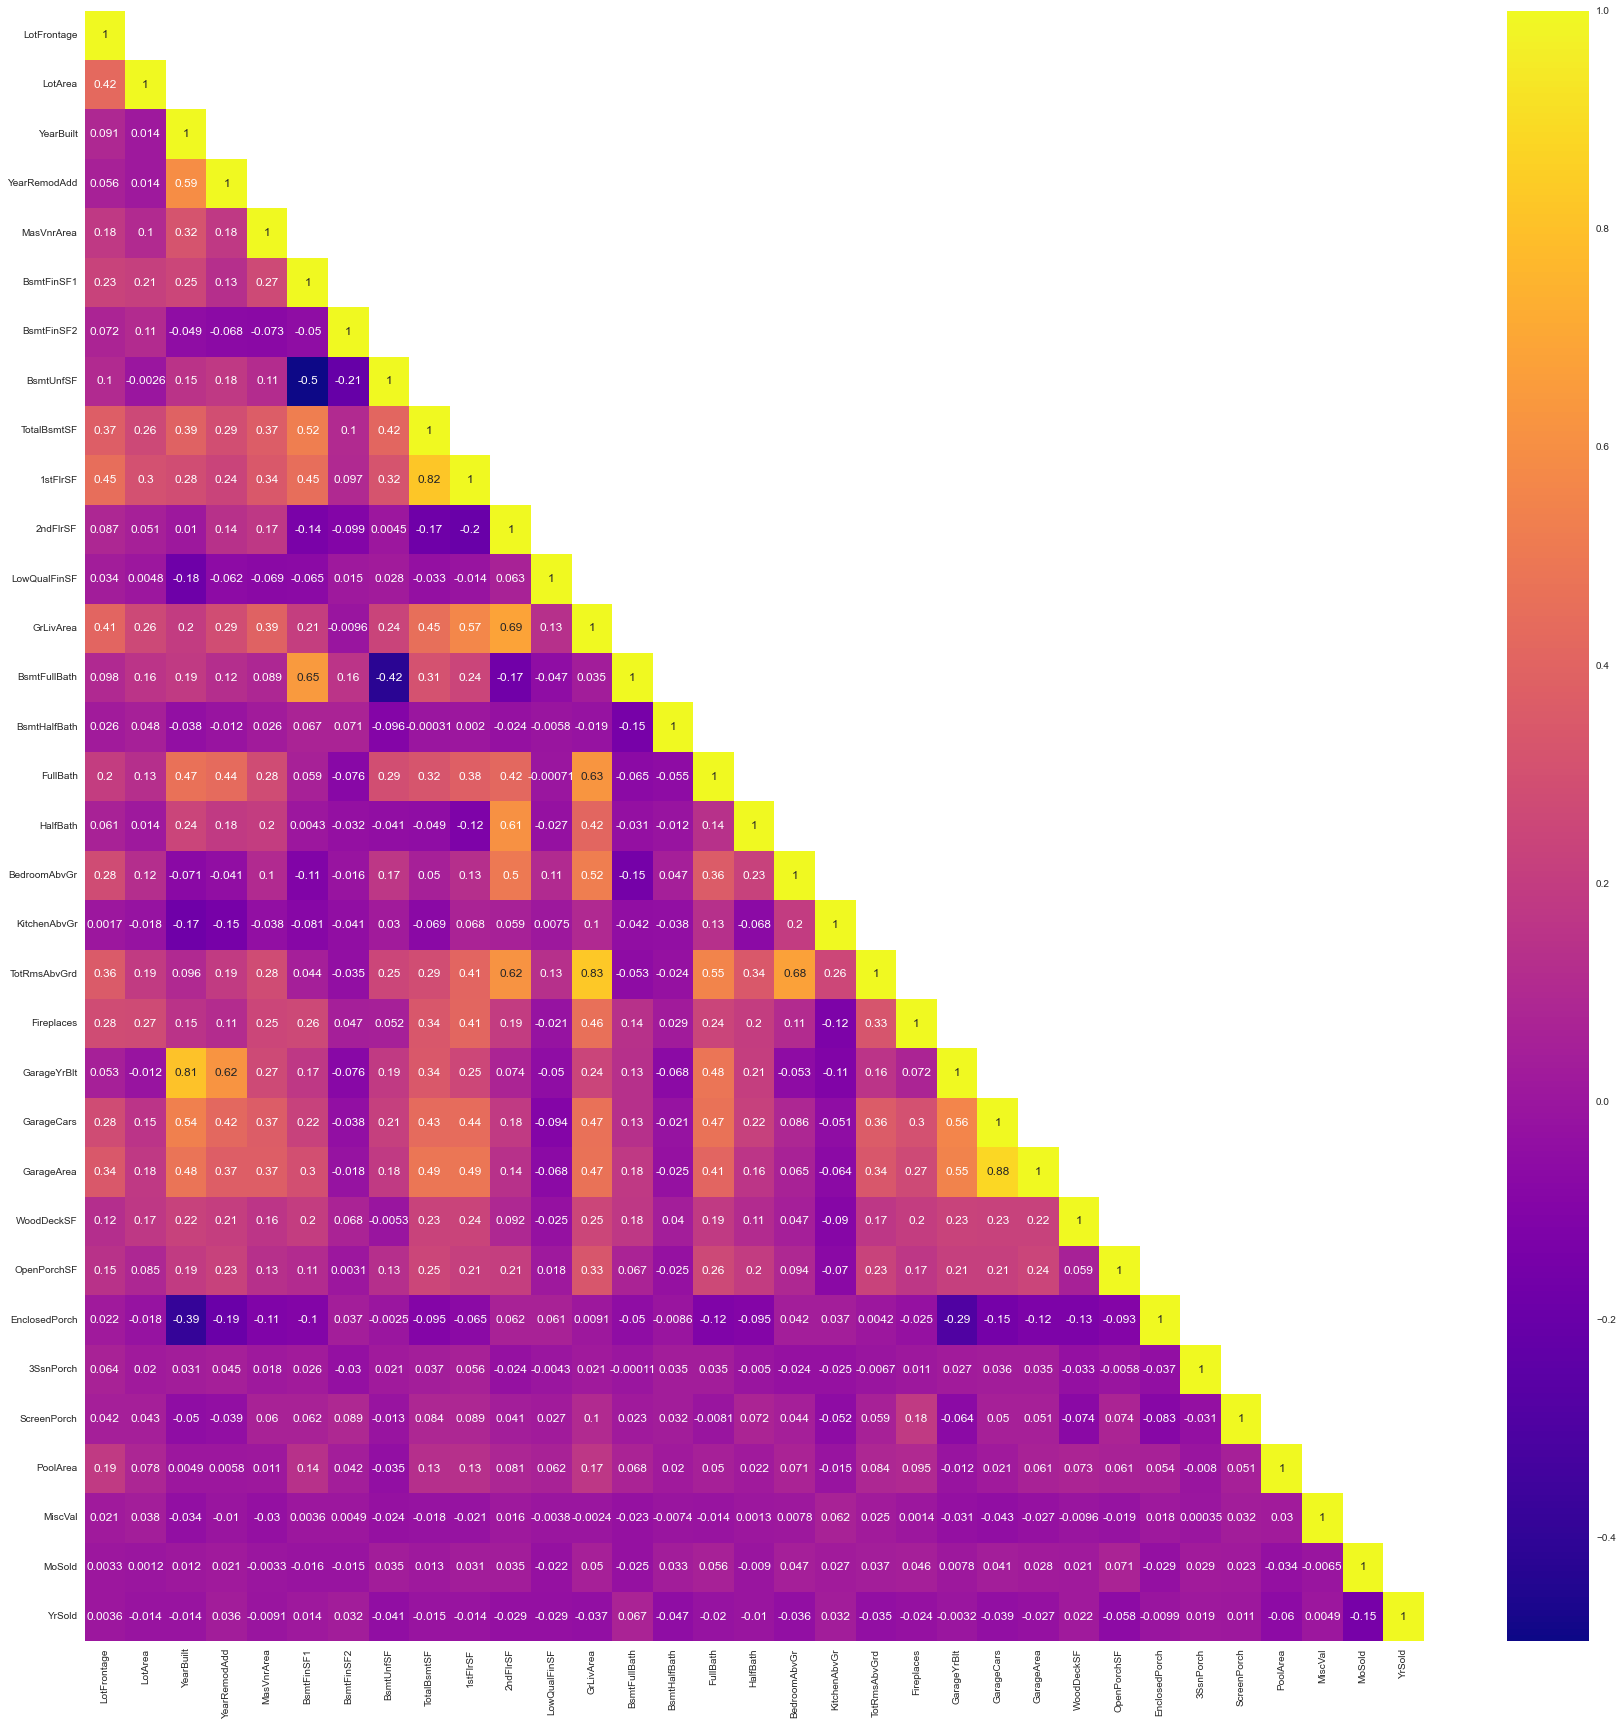

In [51]:
plt.figure(figsize = (30, 30))

sns.heatmap(df_num_sc.corr(), cmap = "plasma", annot = True, mask = np.triu(df_num_sc.corr(), +1))
plt.show()

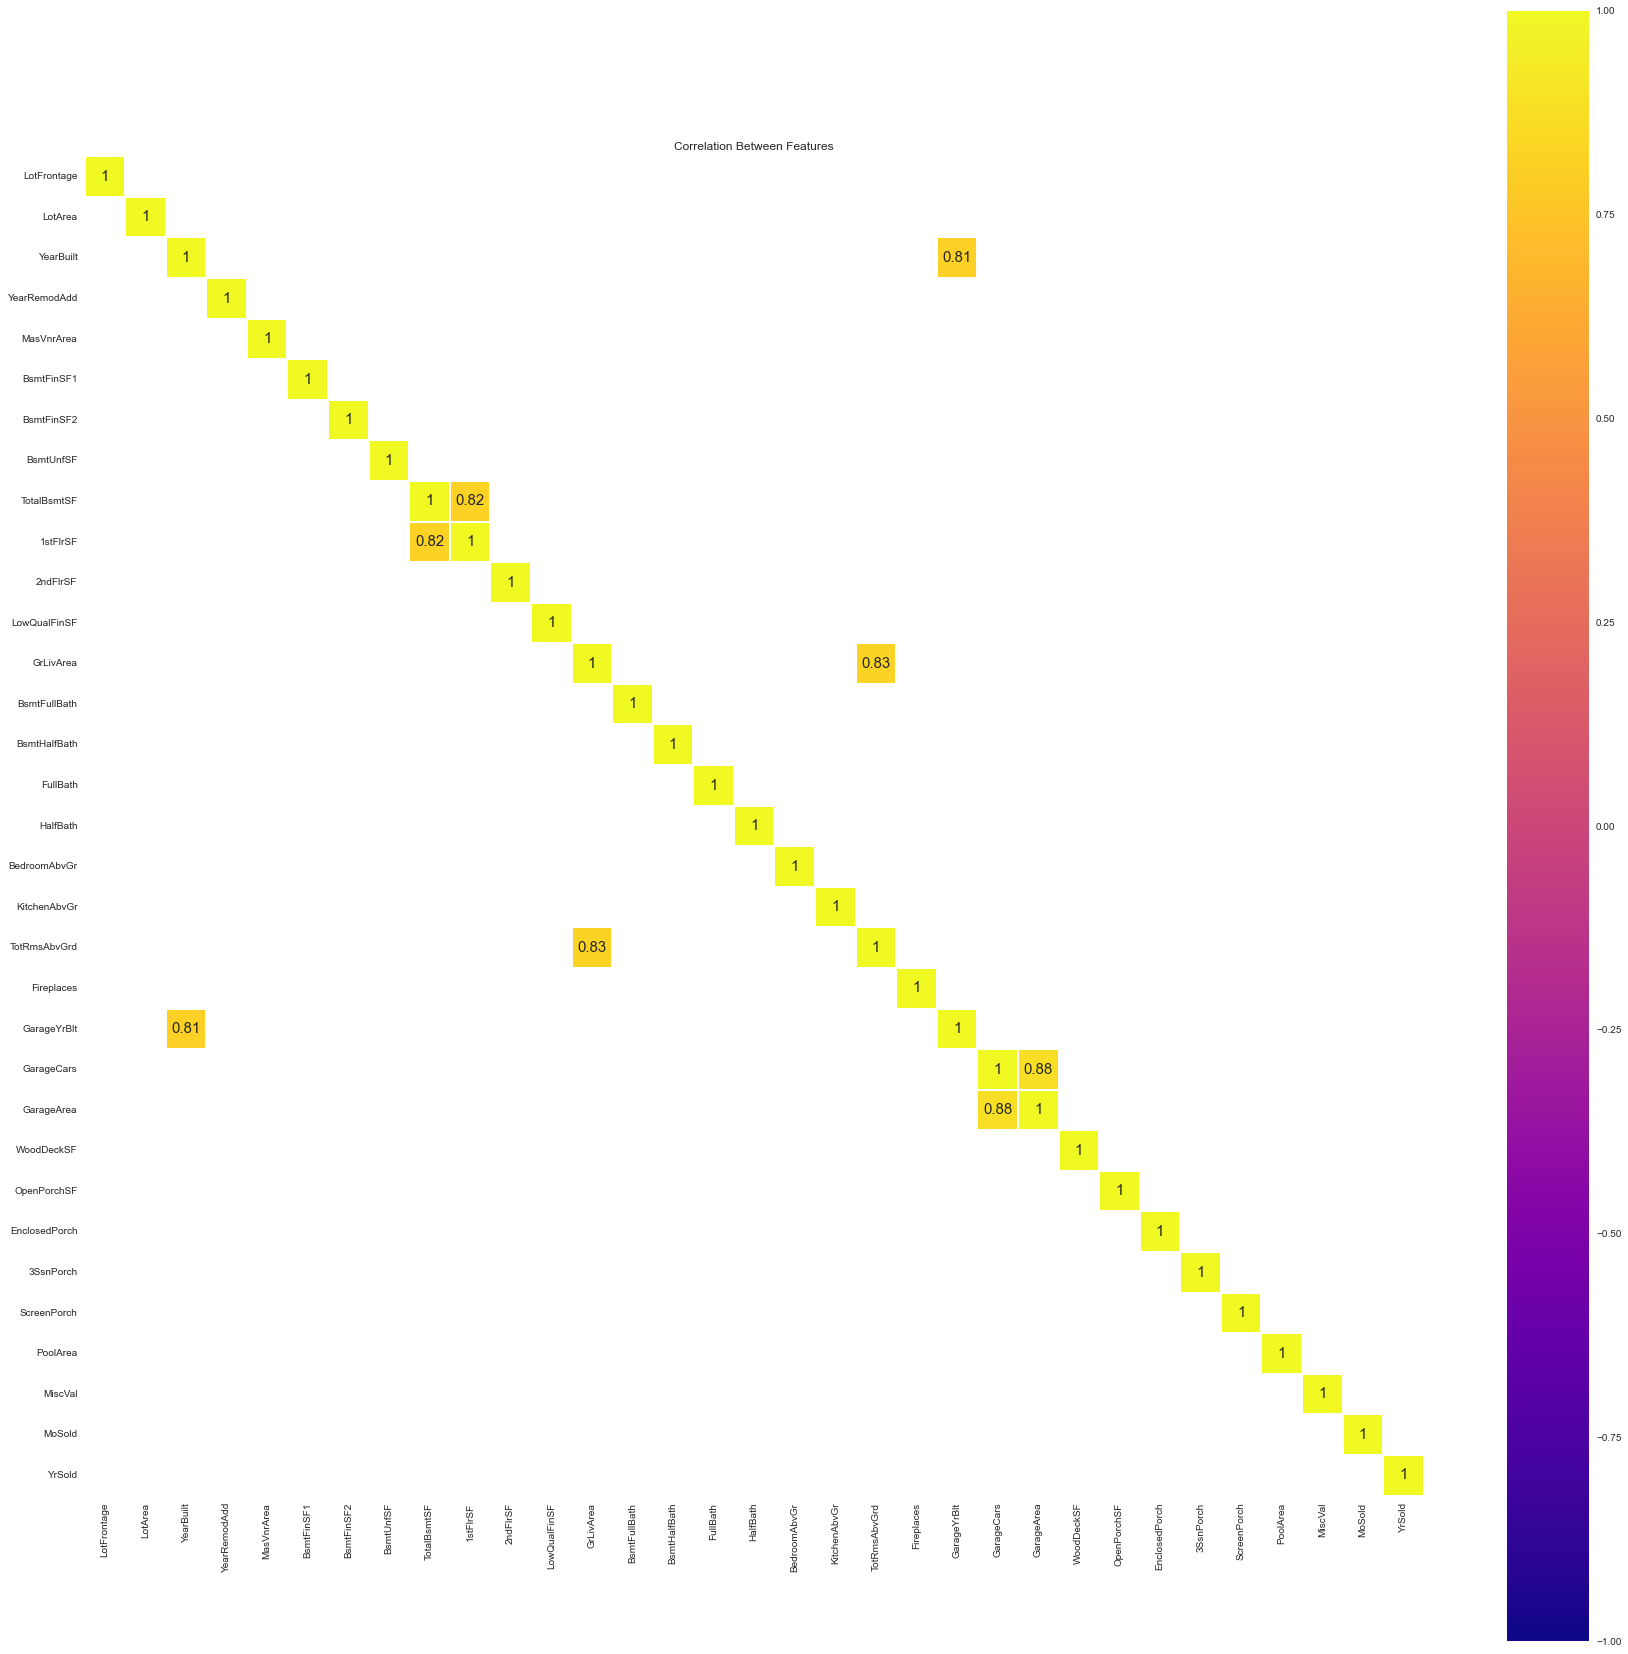

In [52]:
plt.figure(figsize = (30, 30))

sns.heatmap(df_num_sc.corr()[(df_num_sc.corr() >= 0.75) | (df_num_sc.corr() <= -0.75)],
            cmap = "plasma",
            vmax = 1.0,
            vmin = -1.0,
            annot = True,
            linewidths = 0.1,
            annot_kws = {"size" : 15},
            square = True);
plt.title("Correlation Between Features")
plt.show()

In [53]:
# !pip install sweetviz

In [54]:
# import sweetviz as sv

High value of Target variable will inflate the encoding value of categorical variables. Hence, transformation of Target variables 

In [55]:
def cat_boost(cat_input, target):
    
    catboost = ce.cat_boost.CatBoostEncoder()
    catboost.fit(cat_input, target)
    df_encode = round(catboost.transform(cat_input), 2)
    
    return df_encode

In [56]:
df_target = np.log(df_price["SalePrice"])

In [57]:
df_cat_en = cat_boost(df_cat, df_target)

In [58]:
df_cat_en.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,12.34,12.09,12.03,11.94,12.02,12.02,12.00,12.02,12.16,12.04,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81,12.21
1,12.05,12.09,12.03,11.94,12.02,12.02,12.03,12.02,12.32,11.82,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,11.89
2,12.34,12.09,12.03,12.16,12.02,12.02,12.00,12.02,12.16,12.04,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21
3,11.97,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.20,12.04,...,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22,11.89
4,12.34,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.66,12.04,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21


In [59]:
df_num_sc.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [60]:
# df_cat_en.reset_index(drop = True, inplace = True)
# df_num_sc.reset_index(drop = True, inplace = True)

In [61]:
df_priceDataset = pd.concat([df_num_sc, df_cat_en], axis = 1)

In [62]:
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81,12.21
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,11.89
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22,11.89
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21


# Basic Model

In [63]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error

In [64]:
X=df_priceDataset
y=df_target

In [65]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .30, random_state = 0)

In [66]:
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(1022, 79) (438, 79) (1022,) (438,)


# Using SKLearns - Linear Regression Method 

In [67]:
lr = LinearRegression()

In [68]:
model_lr = lr.fit(Xtrain, ytrain)

pred_train = model_lr.predict(Xtrain)

pred_test = model_lr.predict(Xtest)

In [69]:
r2_train = r2_score(ytrain, pred_train)
r2_test = r2_score(ytest, pred_test)

print("R2 Train: ", r2_train)
print("R2 Test: ", r2_test)

R2 Train:  0.9145487043633223
R2 Test:  0.843104082829653


In [70]:
# Claculate the RMSE

In [71]:
print("RMSE Train: ", np.sqrt(mean_squared_error(ytrain, pred_train)))

print("RMSE Test: ", np.sqrt(mean_squared_error(ytest, pred_test)))

RMSE Train:  0.11749714743696044
RMSE Test:  0.15569896024356855


In [72]:
# Clustering

In [73]:
# For clustering we remove the dependent variable.

In [74]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

In [75]:
# Let's scale the data

In [76]:
# from sklearn.preprocessing import StandardScaler

In [77]:
sc = StandardScaler()

In [78]:
df_num_standardize = pd.DataFrame(sc.fit_transform(df_num_sc), columns = df_num_sc.columns)

In [79]:
df_num_standardize.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.250384,-0.207142,1.050994,0.878668,0.506062,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.381302,-0.091886,0.156734,-0.429577,-0.575300,1.171992,-0.288653,-0.641228,0.466465,0.257140,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-0.124047,0.073480,0.984752,0.830215,0.318479,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-0.460946,-0.096897,-1.863632,-0.720298,-0.575300,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.549751,0.375148,0.951632,0.733308,1.355703,0.463568,-0.288653,-0.174865,0.199680,-0.045611,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [80]:
# from sklearn.cluster import KMeans

In [81]:
cluster_range = range(1, 11)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 15, random_state = 2)
    
    clusters.fit(df_num_standardize)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({"num_clusters" : cluster_range, "cluster_errors" : cluster_errors})
clusters_df[0 : 15]

,num_clusters,cluster_errors
0,1,48180.000000
1,2,41888.566697
2,3,39364.447905
3,4,37726.886600
4,5,36480.402142
5,6,34941.839910
6,7,33828.268071
7,8,32489.663235
8,9,31374.475433
9,10,30229.322658


# Day 2 - Case Study (14 - 05 - 2024)

In [82]:
# Elbow Plot

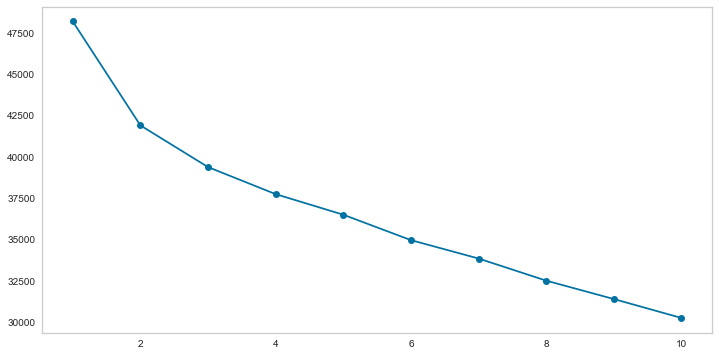

In [83]:
plt.figure(figsize = (12, 6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")
plt.grid()
plt.show()

# Silhouette Score

In [84]:
# from sklearn.metrics import silhouette_score
# from sklearn.metrics import silhouette_samples

In [85]:
n_clusters = [2, 3, 4, 5]

for k in n_clusters:
    cluster = KMeans(n_clusters = k, random_state = 10)
    predict = cluster.fit_predict(df_num_standardize)
    score = silhouette_score(df_num_standardize, predict, random_state = 10)
    print("For {} clusters the silhouette score is {}".format(k, score))

For 2 clusters the silhouette score is 0.139388465208881
For 3 clusters the silhouette score is 0.1378861967687554
For 4 clusters the silhouette score is 0.127468708788367
For 5 clusters the silhouette score is 0.11419311097146036


# Visualization of silhouette score

In [86]:
# !pip install yellowbrick

In [87]:
# from yellowbrick.cluster import SilhouetteVisualizer

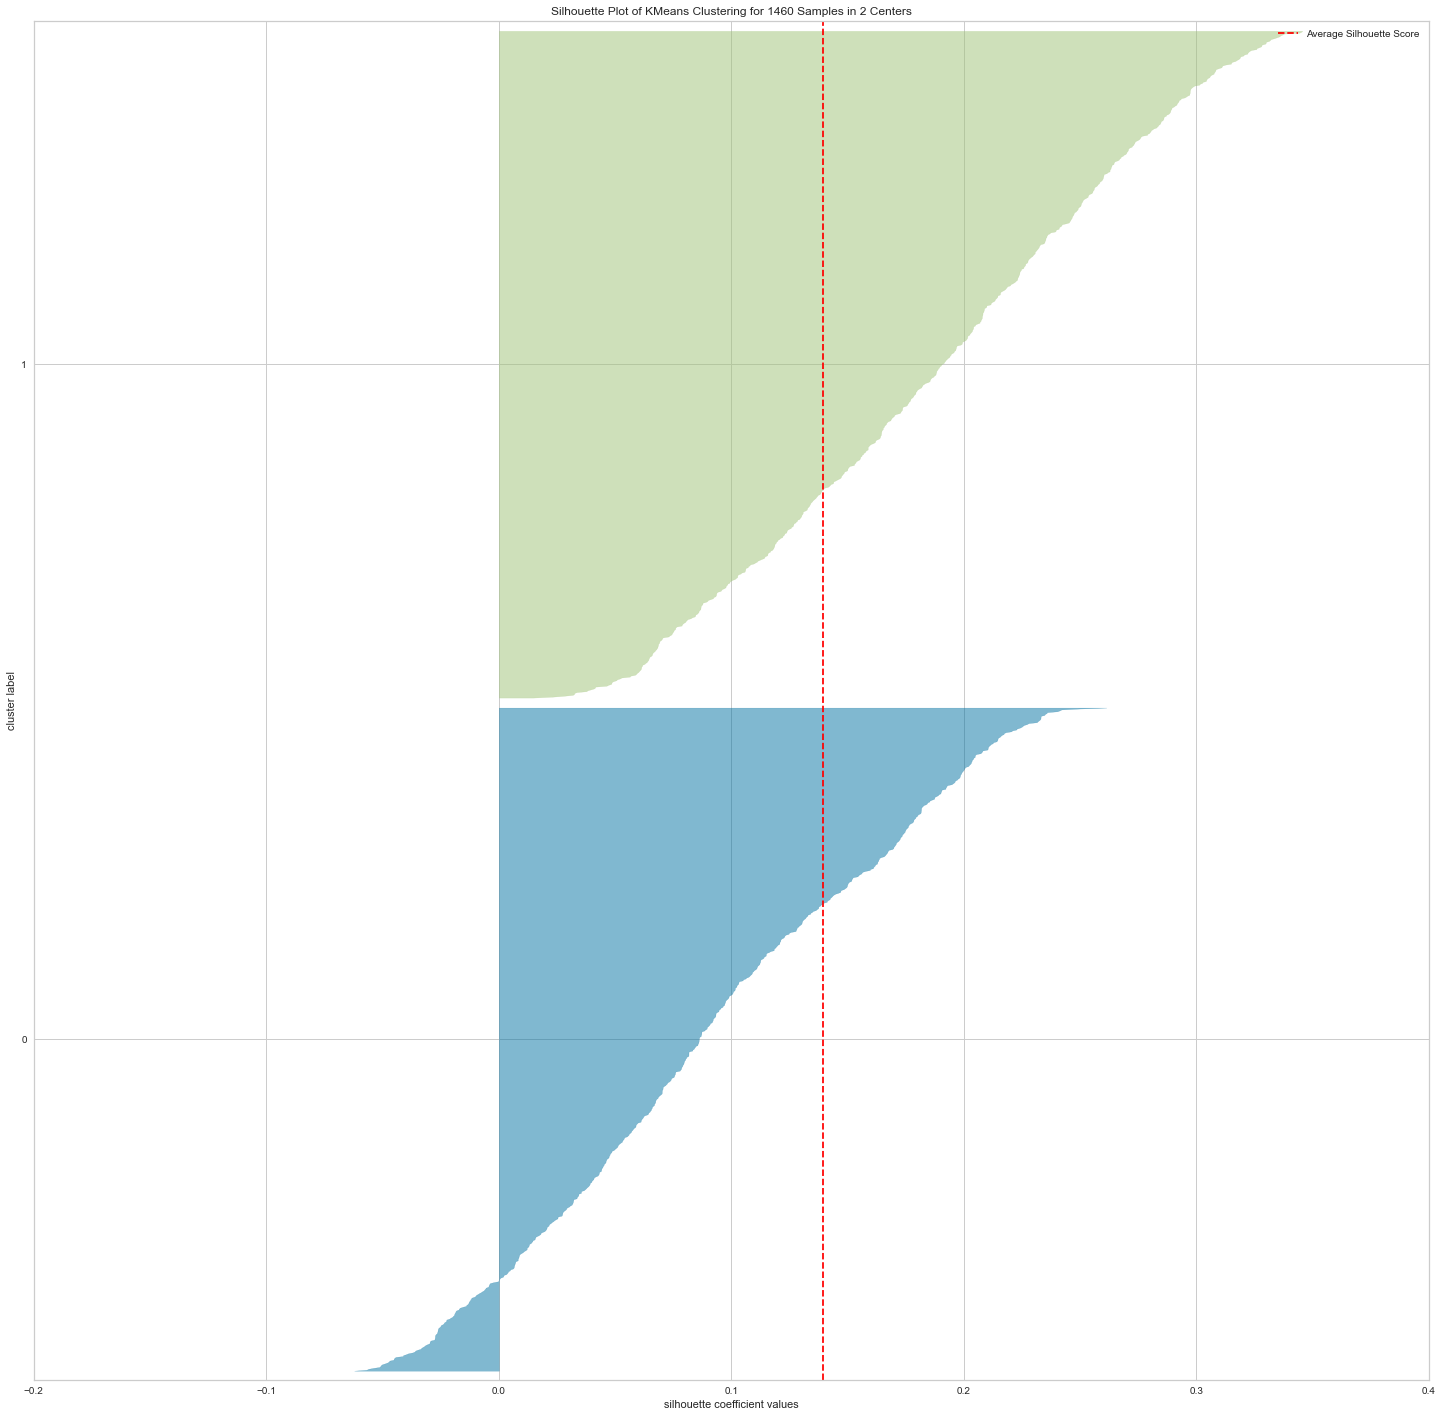

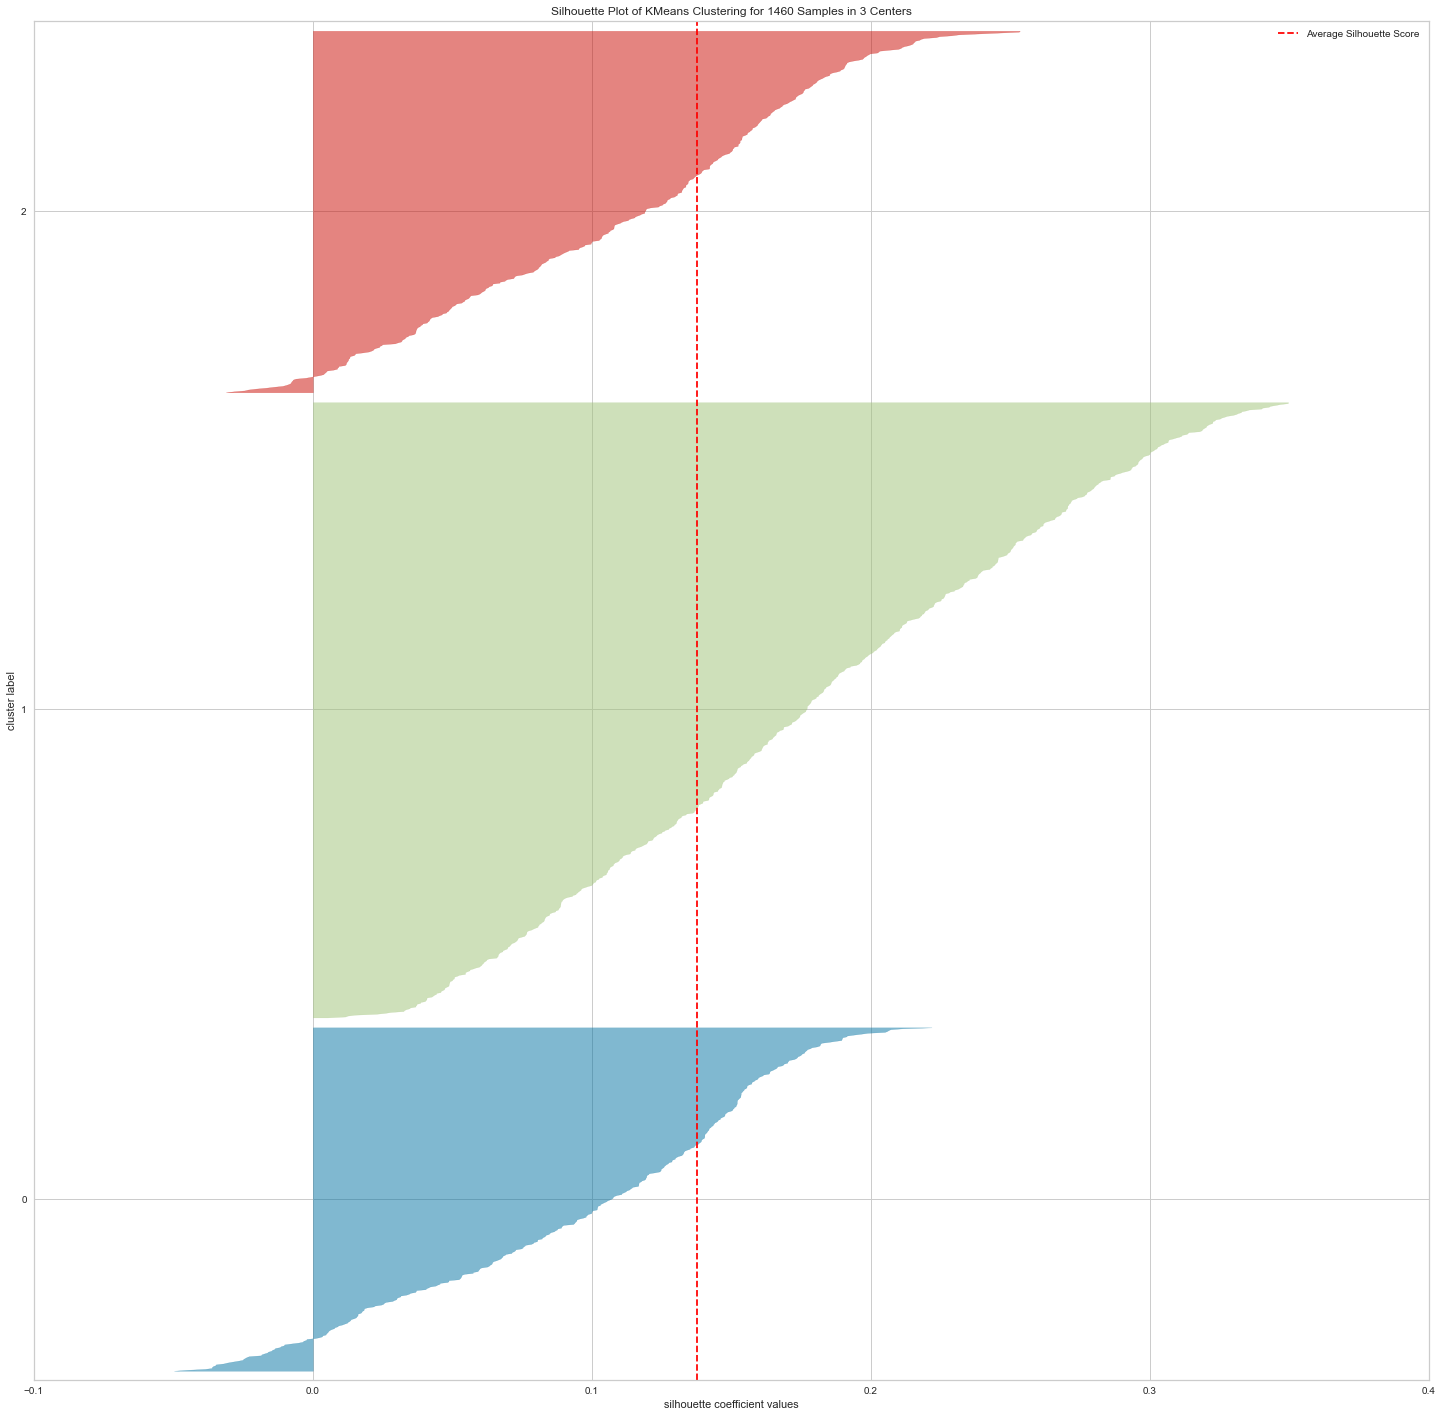

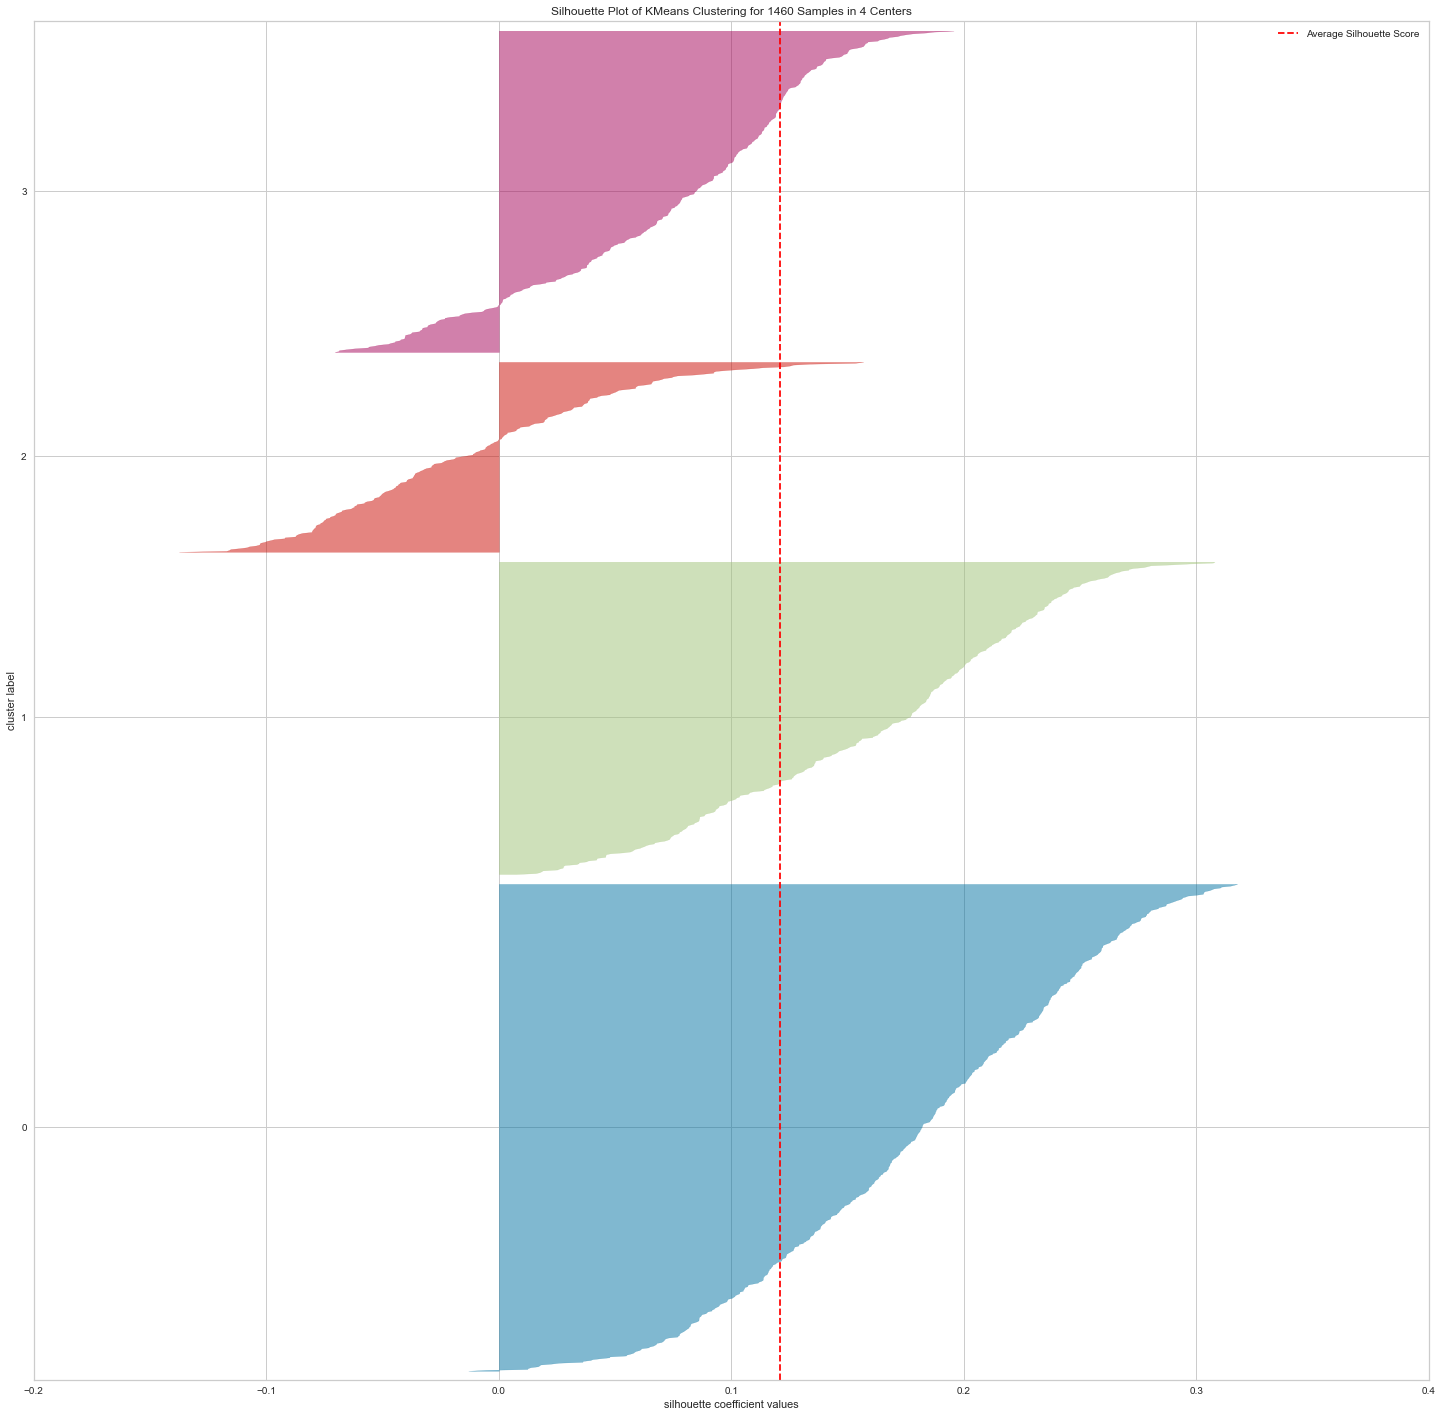

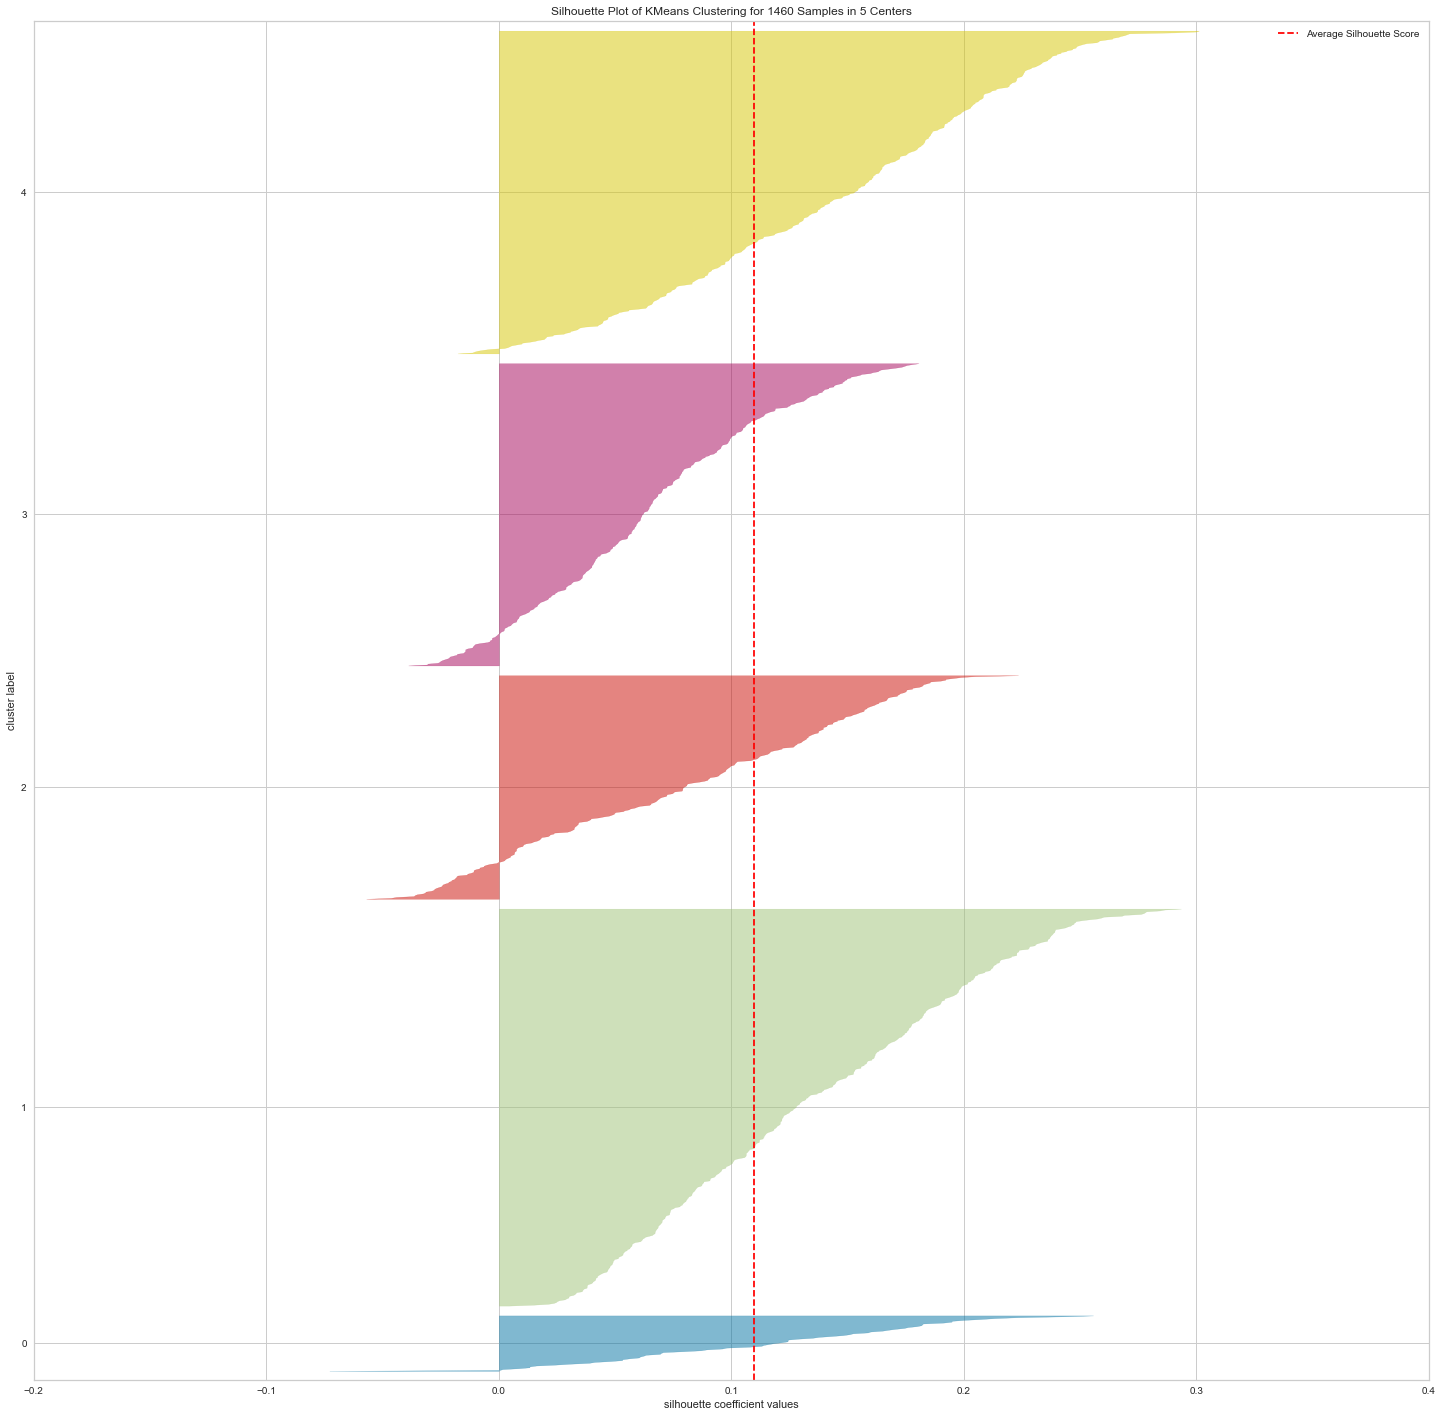

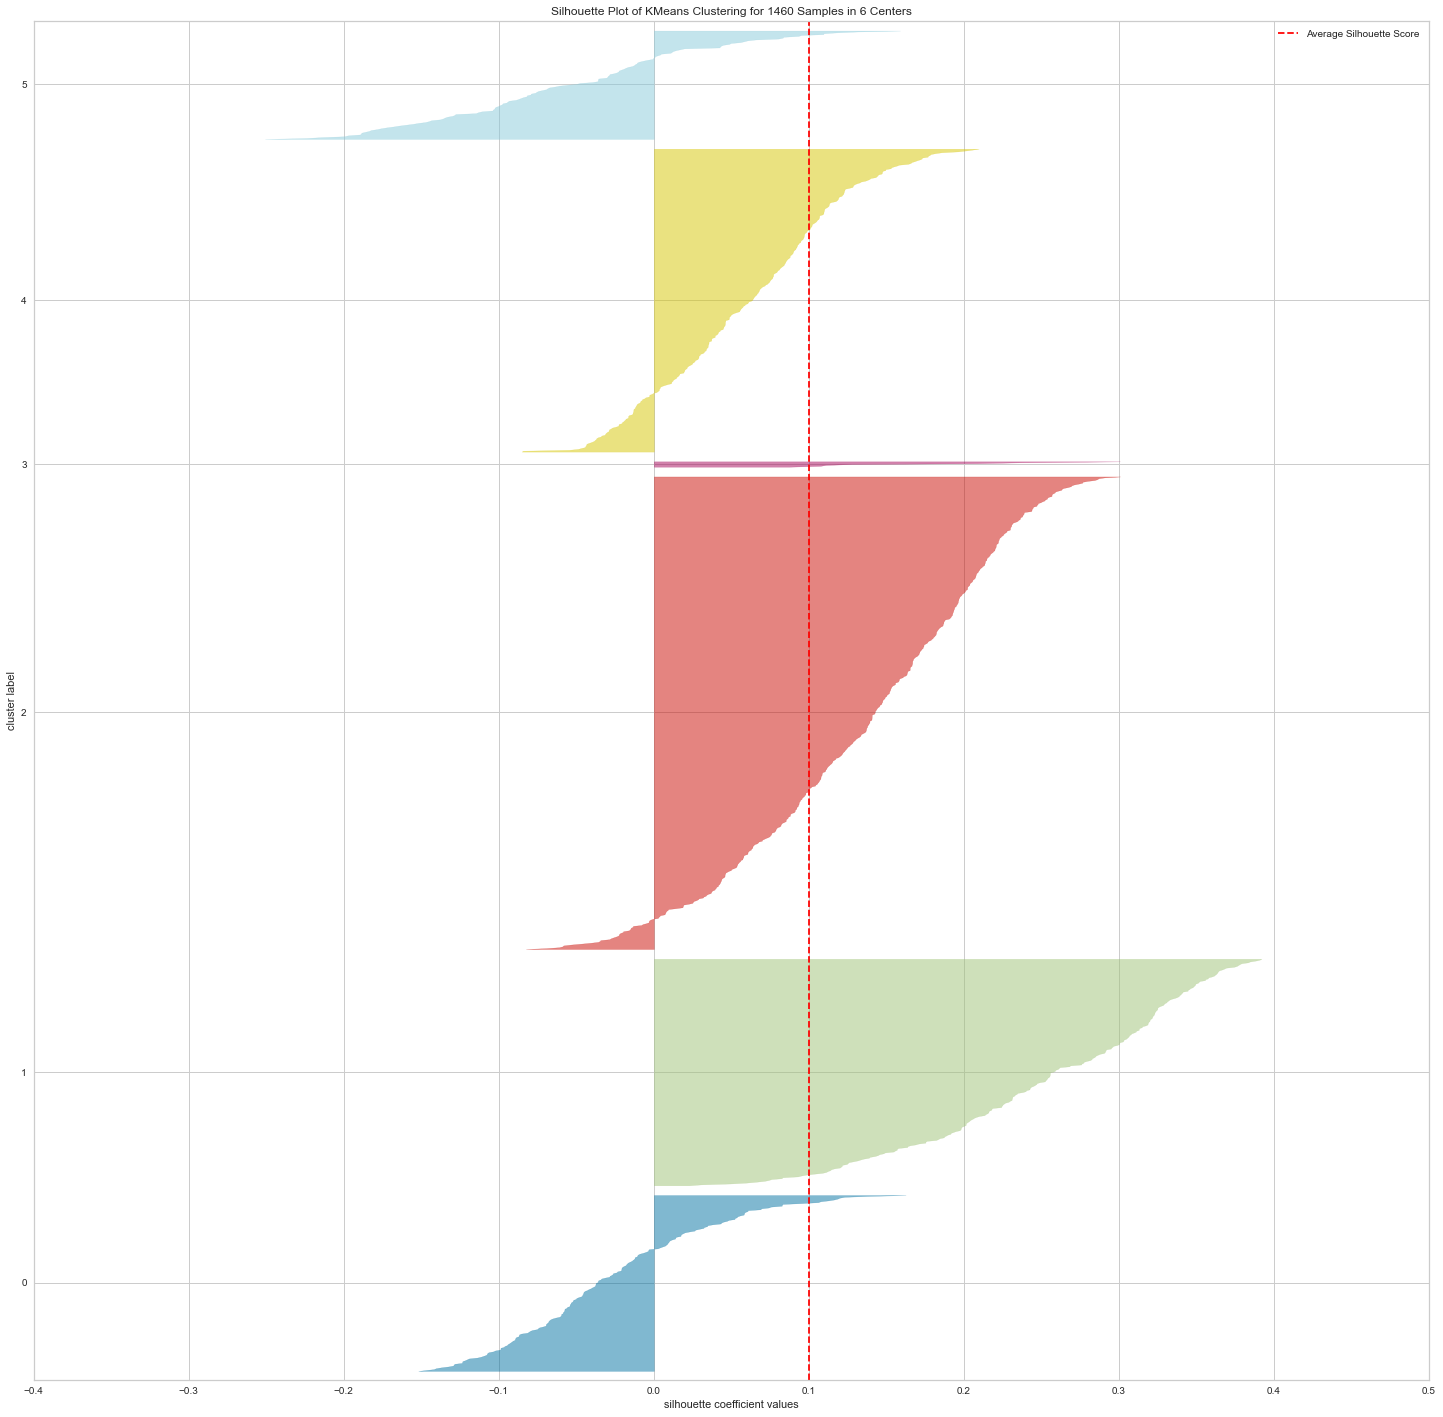

In [88]:
for i in range(2, 7):
    kms = KMeans(n_clusters = i)
    kms.fit(df_num_standardize)
    model = KMeans(n_clusters = i, random_state = 42)
    visualizer = SilhouetteVisualizer(model, colors = "yellowbrick")
    visualizer.fit(df_num_standardize) # fit the data to the visualizer
    visualizer.show()

In [89]:
# Let's take the optimal number of clusters

In [90]:
kmeans = KMeans(n_clusters = 3, n_init = 15, random_state = 2)
kmeans.fit(df_num_standardize)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [91]:
# Labels

In [92]:
df_labels = pd.DataFrame(kmeans.labels_, columns = list(["labels"]))

df_labels["labels"] = df_labels["labels"].astype("category")

In [93]:
df_new_clusters = df_price.join(df_labels)

In [94]:
df_new_clusters.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,labels
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0


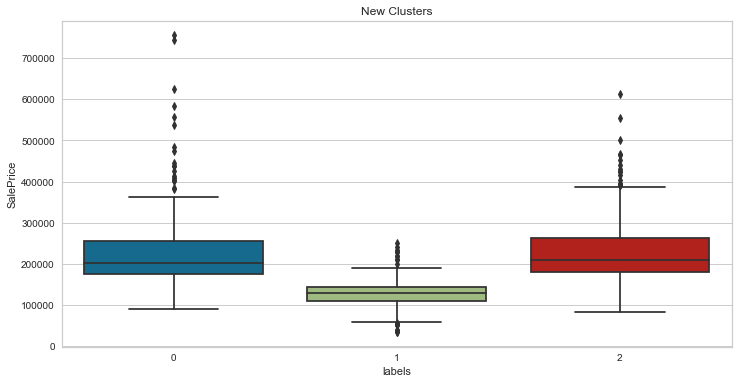

In [95]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'labels', y = 'SalePrice', data = df_new_clusters)
plt.title("New Clusters")
plt.show()

# Principal Component Analysis 

In [96]:
# from sklearn.decomposition import PCA

In [97]:
pca_hp = PCA().fit(df_num_standardize)

In [98]:
# how much of the variance is explained by each individual columns / features / independent variables.

In [99]:
pca_hp.explained_variance_

array([6.55140008e+00, 3.14986432e+00, 2.48600899e+00, 1.88432690e+00,
       1.30983403e+00, 1.15589517e+00, 1.12442318e+00, 1.11708805e+00,
       1.08067584e+00, 1.03637664e+00, 1.01637558e+00, 9.96032548e-01,
       9.51338274e-01, 9.05082971e-01, 8.93799250e-01, 8.52767424e-01,
       8.20315876e-01, 7.36918410e-01, 7.04323197e-01, 6.45078964e-01,
       6.18234253e-01, 5.83710687e-01, 4.87396614e-01, 4.23489391e-01,
       3.87056604e-01, 2.99233052e-01, 2.28382612e-01, 2.00239444e-01,
       1.51784285e-01, 1.30544068e-01, 9.46215296e-02, 1.29203585e-30,
       4.21292648e-32])

In [100]:
pca_hp.components_

array([[ 1.85909004e-01,  1.23787912e-01,  2.36999863e-01, ...,
        -8.79816874e-03,  2.13195754e-02, -1.35226796e-02],
       [ 3.88202169e-02, -1.05753683e-02, -2.28344719e-01, ...,
         2.82218496e-02,  3.01367848e-02, -3.80426302e-02],
       [ 2.81770580e-01,  2.89235231e-01, -3.13595880e-01, ...,
         4.10372593e-02, -1.67502844e-02,  5.97972135e-03],
       ...,
       [ 5.09080280e-02, -1.08506323e-02, -1.97477942e-01, ...,
         1.35496813e-02, -4.75549683e-03,  6.03440316e-03],
       [-1.14952374e-16, -2.08832414e-17, -1.49181312e-16, ...,
        -8.61804938e-18,  8.59081692e-17, -9.70634363e-17],
       [ 0.00000000e+00, -4.89102309e-18,  2.36085206e-16, ...,
        -4.72236820e-17, -2.30342098e-17, -5.45848447e-17]])

In [101]:
pca_hp.n_components_

33

In [102]:
var = np.cumsum(np.round(pca_hp.explained_variance_ratio_, decimals = 3) * 100)

In [103]:
var

array([ 19.8,  29.3,  36.8,  42.5,  46.5,  50. ,  53.4,  56.8,  60.1,
        63.2,  66.3,  69.3,  72.2,  74.9,  77.6,  80.2,  82.7,  84.9,
        87. ,  89. ,  90.9,  92.7,  94.2,  95.5,  96.7,  97.6,  98.3,
        98.9,  99.4,  99.8, 100.1, 100.1, 100.1])

In [104]:
((33 - 21) / 33) * 100

36.36363636363637

In [105]:
# below 90% variance percentage compared to overall
# (33-21)/33*100

# in real life scenario, if the PCA drop is below minimum of 60% we can go with PCA analysis.

In [106]:
# If we get 36, Don't do PCA

In [107]:
# There are 2 test for go ahead with PCA or not
# KMO Test (Kaiser–Meyer–Olkin)
# Bartlett test of sphericity

In [108]:
pca_hp_new = PCA(n_components = 16)
data_reduced = pca_hp_new.fit_transform(df_num_standardize)
data_reduced.transpose()

array([[ 1.27685696,  0.18842752,  1.46190266, ...,  0.61127876,
        -2.65874807, -0.58903176],
       [ 0.13021223, -1.01346629,  0.0551269 , ...,  3.21762721,
        -1.77830436, -1.37661475],
       [-1.47302255,  0.82601642, -1.32306557, ...,  0.92829423,
         2.13413661,  1.64120564],
       ...,
       [-0.42892323,  0.59308905, -0.00423326, ...,  1.83909265,
         0.78697665,  0.0960287 ],
       [ 0.51961601, -0.30498967,  0.09067916, ..., -1.95974595,
        -1.89705769, -0.72921587],
       [-0.92169096, -0.54765748,  0.0527413 , ..., -0.64255993,
         1.16091162,  1.16045359]])

In [109]:
pca_df_hp = pd.DataFrame(data_reduced)

In [110]:
pca_df_hp.head().T

,0,1,2,3,4
0,1.276857,0.188428,1.461903,-0.599678,4.160758
1,0.130212,-1.013466,0.055127,1.090401,0.958770
2,-1.473023,0.826016,-1.323066,0.956728,-0.580689
3,-2.325727,0.163027,-1.725034,-0.085135,-1.699185
4,1.355851,-1.113687,0.085158,0.464159,0.126388
5,-0.679616,1.373979,0.498651,-0.650349,1.324796
6,-0.269804,2.886563,-0.449761,-0.871382,-0.106658
7,0.052442,-0.380177,0.008654,0.989371,-0.116302
8,-0.359141,0.034002,-0.114520,-2.809084,-0.103704
9,0.481748,-0.107579,0.021872,-1.212083,-0.683380


In [111]:
pca_df_hp.columns=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15']
pca_df_hp.head().T

,0,1,2,3,4
PC0,1.276857,0.188428,1.461903,-0.599678,4.160758
PC1,0.130212,-1.013466,0.055127,1.090401,0.958770
PC2,-1.473023,0.826016,-1.323066,0.956728,-0.580689
PC3,-2.325727,0.163027,-1.725034,-0.085135,-1.699185
PC4,1.355851,-1.113687,0.085158,0.464159,0.126388
PC5,-0.679616,1.373979,0.498651,-0.650349,1.324796
PC6,-0.269804,2.886563,-0.449761,-0.871382,-0.106658
PC7,0.052442,-0.380177,0.008654,0.989371,-0.116302
PC8,-0.359141,0.034002,-0.114520,-2.809084,-0.103704
PC9,0.481748,-0.107579,0.021872,-1.212083,-0.683380


In [112]:
corr = pca_df_hp.corr()
corr

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
PC0,1.000000e+00,1.824189e-17,-3.599502e-17,-1.095873e-17,4.986829e-17,9.878734e-18,1.351357e-17,-5.679121e-17,-2.859830e-20,-6.173546e-17,-2.345129e-17,5.927205e-17,-4.675697e-17,3.738429e-17,-4.408757e-17,1.123594e-17
PC1,1.824189e-17,1.000000e+00,1.096206e-15,-4.219121e-16,-1.522865e-16,5.634980e-17,-3.881642e-17,-7.237037e-17,1.582947e-16,-1.013320e-16,-1.029199e-16,9.870249e-17,-4.659593e-17,1.112046e-16,6.693845e-17,6.778880e-18
PC2,-3.599502e-17,1.096206e-15,1.000000e+00,-6.761607e-16,-2.839253e-16,4.533840e-18,1.638481e-18,-2.377194e-16,1.259058e-16,-1.611849e-16,-4.511907e-17,1.765062e-16,-1.124204e-16,2.728103e-16,-5.482620e-17,-4.599200e-18
PC3,-1.095873e-17,-4.219121e-16,-6.761607e-16,1.000000e+00,-2.794760e-16,4.661079e-17,-6.649657e-17,-1.680453e-16,1.185943e-16,-1.306863e-16,-6.447107e-17,1.666333e-16,-8.638802e-18,2.038522e-16,-1.150419e-16,-6.459296e-17
PC4,4.986829e-17,-1.522865e-16,-2.839253e-16,-2.794760e-16,1.000000e+00,1.307972e-16,-5.856377e-17,-2.386089e-16,-2.977274e-17,2.981464e-16,8.684936e-17,-8.161060e-17,1.327911e-16,-1.826265e-17,2.971351e-17,1.179748e-16
PC5,9.878734e-18,5.634980e-17,4.533840e-18,4.661079e-17,1.307972e-16,1.000000e+00,2.593786e-16,-6.692897e-16,-1.034885e-17,-1.175660e-16,-2.421389e-16,1.812500e-16,1.229983e-16,-3.444327e-16,4.215625e-16,-2.709453e-16
PC6,1.351357e-17,-3.881642e-17,1.638481e-18,-6.649657e-17,-5.856377e-17,2.593786e-16,1.000000e+00,-2.150960e-16,2.084728e-16,4.119479e-16,6.413428e-17,1.160892e-16,-3.749322e-16,-2.009845e-16,4.782016e-16,3.036972e-16
PC7,-5.679121e-17,-7.237037e-17,-2.377194e-16,-1.680453e-16,-2.386089e-16,-6.692897e-16,-2.150960e-16,1.000000e+00,-2.292409e-16,-1.605386e-16,9.596338e-17,2.156442e-16,-3.044133e-16,-8.147661e-17,-7.379313e-17,6.751897e-17
PC8,-2.859830e-20,1.582947e-16,1.259058e-16,1.185943e-16,-2.977274e-17,-1.034885e-17,2.084728e-16,-2.292409e-16,1.000000e+00,-2.640291e-16,1.818096e-16,2.066497e-16,-1.687084e-16,1.018040e-16,-2.367691e-16,1.125620e-16
PC9,-6.173546e-17,-1.013320e-16,-1.611849e-16,-1.306863e-16,2.981464e-16,-1.175660e-16,4.119479e-16,-1.605386e-16,-2.640291e-16,1.000000e+00,3.295299e-16,2.322534e-16,-3.117531e-16,-2.812784e-16,4.546162e-16,2.564354e-16


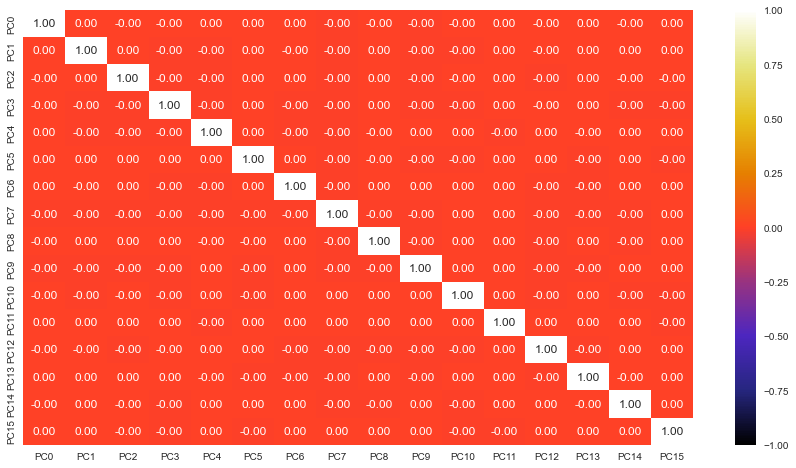

In [113]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True, fmt='.2f',cmap='CMRmap',vmin=-1,vmax=1)
plt.show()

# Check the preformane of model using different algorithms

In [114]:
# from sklearn import tree

# # All the regressor for RandomForest, Neural Network

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.neural_network import MLPRegressor # Multi Layer Precptron

# # Performance tuning using GridSearchCV

# from sklearn.model_selection import GridSearchCV

In [115]:
# You are free to tweak the layer size
annr = MLPRegressor(hidden_layer_sizes = (500), random_state = 123, max_iter = 10000)

rfr = RandomForestRegressor(random_state = 123)

dtr = tree.DecisionTreeRegressor(random_state = 123)

In [116]:
df_priceDataset = pd.concat([df_num_sc, df_cat_en], axis = 1)

In [117]:
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81,12.21
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,11.89
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22,11.89
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21


In [118]:
df_priceDataset.shape

(1460, 79)

In [119]:
X = df_priceDataset
y = df_target

In [120]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = .30)

In [121]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1022, 79) (438, 79) (1022,) (438,)


# Decision Tree

In [122]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=123)

# Accuracy score for the decision tree model

In [123]:
dtr.score(x_train, y_train)

1.0

In [124]:
dtr.score(x_test, y_test)

0.7050668568460505

In [125]:
param_grid = {
                'max_depth' : [10, 15, 20, 25, 30],
                'min_samples_leaf' : [3, 15, 30],
                'min_samples_split' : [15, 30, 35, 40, 50]
                }

dtr = tree.DecisionTreeRegressor(random_state = 123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [15, 30, 35, 40, 50]})

In [126]:
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 35}


In [127]:
dtr = tree.DecisionTreeRegressor(max_depth=10,
                                 min_samples_split=35,
                                 min_samples_leaf=3,
                                 random_state=123)

dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=35,
                      random_state=123)

In [128]:
print("Score for training", dtr.score(x_train, y_train))
print("Score for testing", dtr.score(x_test, y_test))

Score for training 0.8843228840029983
Score for testing 0.7709190475655975


In [129]:
print('RMSE for train', np.sqrt(mean_squared_error(y_train, dtr.predict(x_train))))
print('RMSE for test', np.sqrt(mean_squared_error(y_test, dtr.predict(x_test))))

RMSE for train 0.13835357125891018
RMSE for test 0.18216373247687745


In [130]:
# Random Forest

In [131]:
param_grid = {
    'max_depth': [7,10],  # 3,5,7,9
    'max_features': [4, 6],   # SQRT of number of columns
    'min_samples_leaf': [3, 15,30],  # 1-3% of the total training data
    'min_samples_split': [30, 50,100],  # 3 times the min_sample_leaf
    'n_estimators': [300, 500] # oob error rate
}

rfr = RandomForestRegressor(random_state = 123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [132]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [133]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


In [134]:
rfr = RandomForestRegressor(n_estimators=300,
                            max_depth=10,
                            max_features=6,
                            min_samples_split=30,
                            min_samples_leaf=3,
                            random_state=123)

In [135]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=3,
                      min_samples_split=30, n_estimators=300, random_state=123)

In [136]:
print("Score for training",rfr.score(x_train,y_train))
print("Score for testing",rfr.score(x_test,y_test))

Score for training 0.8840478390313746
Score for testing 0.8540354203868122


In [137]:
print('RMSE for train', np.sqrt(mean_squared_error(y_train, rfr.predict(x_train))))
print('RMSE for test', np.sqrt(mean_squared_error(y_test, rfr.predict(x_test))))

RMSE for train 0.13851795494328079
RMSE for test 0.1454089594470164


# Gradient Boosting

In [138]:
# from sklearn.ensemble import GradientBoostingRegressor

In [139]:
gbm = GradientBoostingRegressor()
gbm.fit(x_train, y_train)

GradientBoostingRegressor()

In [140]:
print('RMSE for train', np.sqrt(mean_squared_error(y_train, gbm.predict(x_train))))
print('RMSE for test', np.sqrt(mean_squared_error(y_test, gbm.predict(x_test))))

RMSE for train 0.07767124741869981
RMSE for test 0.11573553955807396


# Gride Search CV

In [152]:
gbm = GradientBoostingRegressor(n_estimators = 300, loss = 'huber', criterion = 'friedman_mse')


In [153]:
gbm.fit(x_train, y_train)


GradientBoostingRegressor(loss='huber', n_estimators=300)

In [155]:
print('RMSE for train', np.sqrt(mean_squared_error(y_train, gbm.predict(x_train))))
print('RMSE for test', np.sqrt(mean_squared_error(y_test, gbm.predict(x_test))))

RMSE for train 0.05863983211900276
RMSE for test 0.11674501658862901


# Extreme Gradient Boosting

In [156]:
from xgboost import XGBRegressor

In [157]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [158]:
print("Score for training",xgb.score(x_train,y_train))
print("Score for testing",xgb.score(x_test,y_test))

Score for training 0.9999012231084595
Score for testing 0.8852158290105977


In [159]:
print('RMSE for train', np.sqrt(mean_squared_error(y_train, xgb.predict(x_train))))
print('RMSE for test', np.sqrt(mean_squared_error(y_test, xgb.predict(x_test))))

RMSE for train 0.004042912342272501
RMSE for test 0.12894616408363815


# GridSearchCV for Xtreme Gradient Boosting

In [160]:
params = ({'n_estimators' : [100, 200, 300], 'learning_rate' : [0.1], 
           'colsample_bytree' : [0.5, 0.8], 'max_depth' : [2, 4,6] })


In [161]:
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params, cv=5)

In [162]:
grid_xgb.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [163]:
print("Score for training",grid_xgb.score(x_train,y_train))

print("Score for testing",grid_xgb.score(x_test,y_test))

print('RMSE for train', np.sqrt(mean_squared_error(y_train, grid_xgb.predict(x_train))))

print('RMSE for test', np.sqrt(mean_squared_error(y_test, grid_xgb.predict(x_test))))

Score for training 0.9895125118494881
Score for testing 0.9095279422711368
RMSE for train 0.04165838115025977
RMSE for test 0.11447869243322588


# Feature Selection and use of PipeLine

In [164]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [165]:
df_priceDataset = pd.concat([df_num_sc, df_cat_en], axis = 1)
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81,12.21
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,11.89
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22,11.89
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21


In [166]:
X = df_priceDataset
y = df_target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 0)

In [167]:
pipe = Pipeline((('sfm', SelectFromModel(estimator = RandomForestRegressor(), max_features = 70)), ('lr', LinearRegression())))

pipe.fit(Xtrain, ytrain)
print('Training R2')
print(pipe.score(Xtrain, ytrain))
print('Testing R2')
print(pipe.score(Xtest, ytest))


Training R2
0.8638721980251526
Testing R2
0.798966780578139


In [168]:
# Scaling with pipline and cossval score 

In [169]:
from sklearn.model_selection import cross_val_score

In [170]:
df_priceDataset = pd.concat([df_num_sc, df_cat_en], axis = 1)

X = df_priceDataset
y = df_target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 0)

In [171]:
pipe = Pipeline((('sc', StandardScaler()), ('lr', LinearRegression())))

pipe.fit(Xtrain, ytrain)
print('Training R2')
print(pipe.score(Xtrain, ytrain))
print('Testing R2')
print(pipe.score(Xtest, ytest))
print('Series of score 10')
CrossValScore = cross_val_score(pipe, Xtrain, ytrain, cv = 10)
print(CrossValScore)
print('Mean R2')
print(np.mean(CrossValScore))

Training R2
0.9145486090289984
Testing R2
0.8431080130440329
Series of score 10
[0.90603002 0.77050299 0.85776679 0.85292332 0.8762869  0.90874184
 0.88684364 0.92346126 0.91916409 0.89845746]
Mean R2
0.8800178301333151


In [172]:
# Use of column Transform - Scaling and encoding the variables 

In [173]:
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

In [174]:
column_trans = ColumnTransformer([
    ('catboost', ce.cat_boost.CatBoostEncoder(), make_column_selector(dtype_exclude=np.number))
])

In [175]:
df_cat_en = pd.DataFrame(column_trans.fit_transform(df_cat, df_target), columns = df_cat.columns)

In [176]:
df_cat_en.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
1,12.024051,12.135873,12.135873,12.135873,12.135873,12.135873,12.024051,12.135873,12.024051,12.024051,...,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.024051,12.024051
2,12.135873,12.126919,12.126919,12.024051,12.126919,12.126919,12.135873,12.126919,12.135873,12.135873,...,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919,12.066531,12.135873
3,12.024051,12.174481,12.174481,12.170609,12.174481,12.174481,12.024051,12.174481,12.024051,12.196304,...,12.174481,12.174481,12.174481,12.024051,12.174481,12.174481,12.174481,12.174481,12.150076,12.066531
4,12.196304,12.109464,12.109464,12.063538,12.109464,12.109464,12.066531,12.109464,12.024051,12.109577,...,12.109464,12.109464,12.109464,12.174481,12.109464,12.109464,12.109464,12.109464,12.074907,12.196304


In [177]:
# Decision Tree and Pipeline

In [178]:
df_priceDataset = pd.concat([df_num_sc, df_cat_en], axis = 1)

X = df_priceDataset
y = df_target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 0)

In [179]:
# from sklearn.

In [180]:
pipe = Pipeline((
    ('dt', tree.DecisionTreeRegressor(max_depth = 5)),
))

pipe.fit(Xtrain, ytrain)
print('Training R2')
print(pipe.score(Xtrain, ytrain))
print('Testing R2')
print(pipe.score(Xtest, ytest))
print('Series of score 10')
CrossValScore = cross_val_score(pipe, Xtrain, ytrain, cv = 10)
print(CrossValScore)
print('Mean R2')
print(np.mean(CrossValScore))

Training R2
0.857840446607159
Testing R2
0.7021186491069782
Series of score 10
[0.69026993 0.67314138 0.69047852 0.75751005 0.77230641 0.71279176
 0.66537643 0.59529026 0.69274623 0.70472605]
Mean R2
0.6954637031468249


In [181]:
# Day - 3

# Application of RFE - Feature selection using Pipeline 

In [182]:
df_priceDataset = pd.concat([df_num_sc, df_cat_en], axis = 1)

X = df_priceDataset
y = df_target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 0)

In [183]:
# from sklearn.feature_selection import RFE

In [184]:
RFE_pipe = Pipeline((
("rfe", RFE(estimator = LinearRegression(), n_features_to_select = 50)),
))

RFE_pipe.fit(Xtrain, ytrain)
print('Training R2')
print(RFE_pipe.score(Xtrain, ytrain))
print('Testing R2')
print(RFE_pipe.score(Xtest, ytest))
print('Series of score 10')
CrossValScore = cross_val_score(RFE_pipe, Xtrain, ytrain, cv = 10)
print(CrossValScore)
print('Mean R2')
print(np.mean(CrossValScore))

Training R2
0.8666001778932189
Testing R2
0.808860764499644
Series of score 10
[0.86244489 0.81367185 0.83623778 0.87857068 0.79708662 0.82829782
 0.81234202 0.88835396 0.84556739 0.84550934]
Mean R2
0.8408082343306387


In [188]:
# Principle Components Analysis - PCA in Pipeline 

In [189]:
df_priceDataset = pd.concat([df_num_sc, df_cat_en], axis = 1)

X = df_priceDataset
y = df_target


In [190]:
from sklearn.decomposition import PCA

In [191]:
PCA_pipe = Pipeline((
    ('sc', StandardScaler()), 
    ('pca', PCA(n_components = 15)),
    ('lr', LinearRegression())
))

PCA_pipe.fit(Xtrain, ytrain)
print('Training R2')
print(PCA_pipe.score(Xtrain, ytrain))
print('Testing R2')
print(PCA_pipe.score(Xtest, ytest))
print('Series of score 10')
CrossValScore = cross_val_score(PCA_pipe, Xtrain, ytrain, cv = 10)
print(CrossValScore)
print('Mean R2')
print(np.mean(CrossValScore))

Training R2
0.8629687626426128
Testing R2
0.7951828331979452
Series of score 10
[0.86960038 0.74609333 0.84253189 0.90144617 0.83602451 0.85281402
 0.85111739 0.88100529 0.90038985 0.86994759]
Mean R2
0.8550970425532174


In [192]:
PCA_pipe['pca'].explained_variance_ratio_

array([0.18009612, 0.05922071, 0.04971011, 0.04486927, 0.0346676 ,
       0.025833  , 0.02475394, 0.02224719, 0.02032593, 0.01910088,
       0.01833735, 0.01738599, 0.01728941, 0.01611604, 0.0157027 ])

In [193]:
PCA_pipe['pca'].explained_variance_ratio_.cumsum()

array([0.18009612, 0.23931683, 0.28902694, 0.33389621, 0.36856381,
       0.39439681, 0.41915075, 0.44139795, 0.46172388, 0.48082476,
       0.49916211, 0.5165481 , 0.53383751, 0.54995355, 0.56565625])

In [194]:
# Comparing The Performance of the model

In [195]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn import model_selection

In [196]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 0)

In [197]:
df_priceDataset = pd.concat([df_num_sc, df_cat_en], axis = 1)

X = df_priceDataset
y = df_target


In [198]:
lr = LinearRegression()
dt = tree.DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators = 100)
gb = GradientBoostingRegressor(n_estimators = 150)

In [200]:
models = []
models.append(('Linear Regression', lr))
models.append(('Decision Tree Regressor', dt))
models.append(('Random Forest Regressor', rf))
models.append(('Gradient Boosting Regressor', gb))

Linear Regression: 0.882865 (0.258652)
Decision Tree Regressor: 0.650434 (0.063507)
Random Forest Regressor: 0.857822 (0.032734)
Gradient Boosting Regressor: 0.884222 (0.023567)


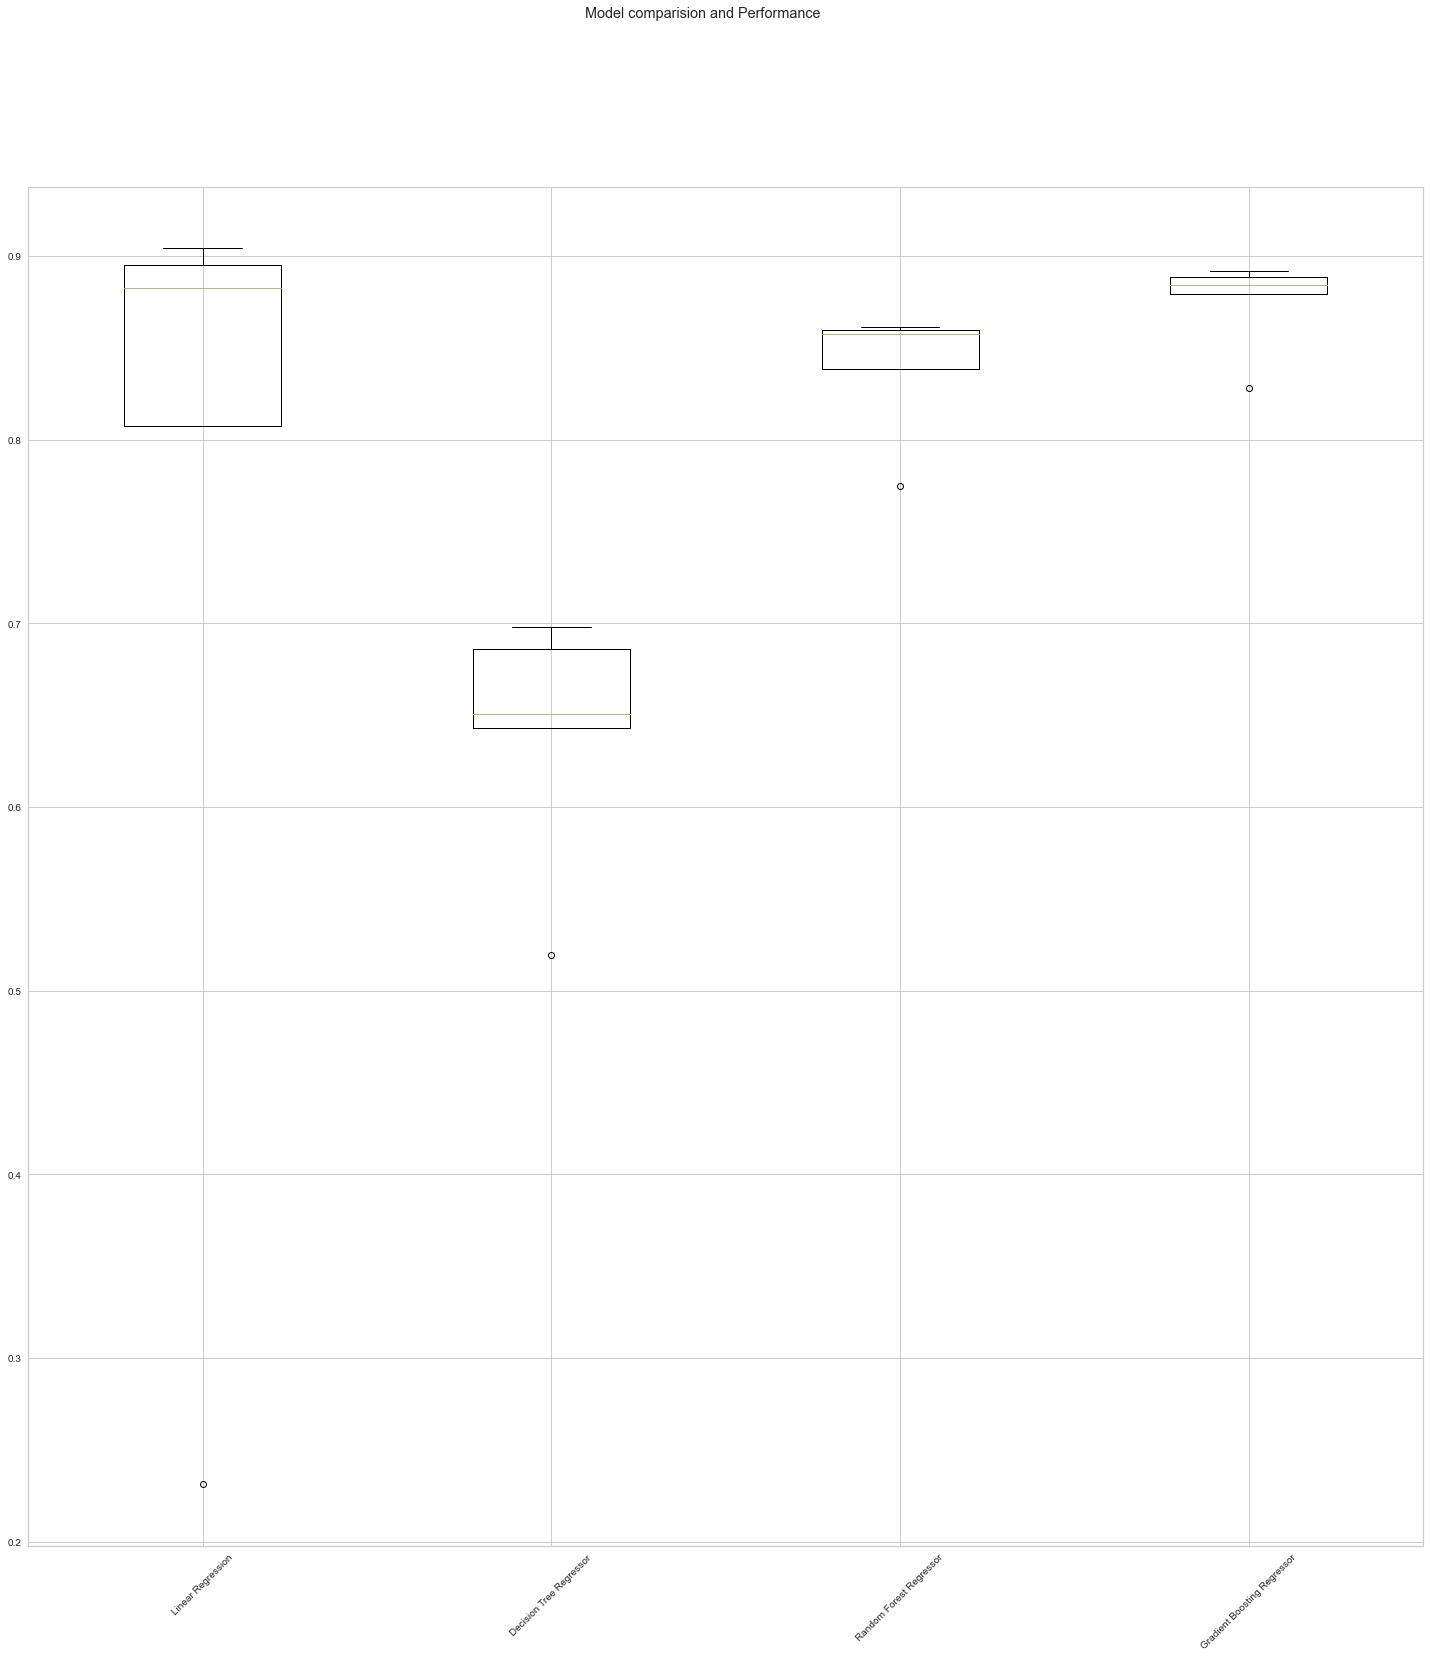

In [203]:
# evaluate each model in turn
results = []
names = []


for name, model in models:
    kfold = model_selection.KFold(n_splits=5)

    cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
    print(msg)



# comparision of Algorithms using Boxplots
fig = plt.figure()
fig.suptitle('Model comparision and Performance')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.show()